

Credit Card Routing for Online Purchase via Predictive Modelling
1. Business Understanding

Case Description:

This is your first day as a data scientist at one of the world’s largest retail companies. Already on your first day, you are invited to a meeting with important business stakeholders from the online payment department, who ask for your help: Over the past year they have encountered a high failure rate of online credit card payments. The company loses a lot of money due to failed transactions and customers become increasingly unsatisfied with the online shop.

Such online credit card payments are performed via so-called payment service providers, referred to as “PSPs” by the business stakeholders. Your company has contracts with four different PSPs and pays transaction fees for every single payment. The current routing logic is manual and rule-based. Business decision-makers, however, hope that with predictive modelling and with your help, a smarter way of routing a PSP to a transaction is possible.
Project Aim:

Help the business to automate the credit card routing via a predictive model. Such a model should increase the payment success rate by finding the best possible PSP for each transaction and at the same time keep the transaction fees low.
Task Description:

The task consists of both coding and conceptual steps. Here is a list of tasks, which should be included in your final document:

- Structure the project via the CRISP-DM or Team DS methodologies and give a recommendation of how a git repository for the project could look like. Note that you do not have to structure your final code according to your git-repository proposal.
- Assess the quality of the provided data set. Prepare and visualize your findings of the initial data analysis in order that business stakeholders can understand them in a clear and easy way.
- Provide a baseline model as well as an accurate predictive model, which fulfills business requirements, i.e. increase credit card success rate and keep fees low.
- In order that the business places confidence in your model, discuss the importance of the individual features and make the results of the model interpretable. - - - Moreover, a sophisticated error analysis is very important for the business to understand the drawbacks of your approach.
- In the last step of the project, give a proposal of how your model could be used by the business in everyday work, for instance, via a graphical user interface (GUI).



In [110]:
# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical computing
import numpy as np

# Importing io for input/output operations
import io

# Importing classification models for building predictive models
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression Classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors Classifier
from xgboost import XGBClassifier  # XGBoost Classifier
import xgboost as xgb

# Importing metrics for model evaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, r2_score, mean_absolute_error,
                             mean_squared_error, roc_curve, auc, precision_recall_curve)

# Importing model selection and hyperparameter tuning utilities
from sklearn.model_selection import (GridSearchCV, train_test_split, learning_curve,
                                     StratifiedKFold, cross_val_score)

# Importing preprocessing utilities for feature scaling
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.calibration import label_binarize
# Importing visualization libraries
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import seaborn as sns  # Seaborn for enhanced visualization
import matplotlib.lines as mlines  # For drawing lines in plots
import matplotlib.patches as patches  # For drawing shapes in plots

# Importing library for handling imbalanced datasets
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique

# Importing SHAP library for model interpretability
import shap  # SHapley Additive exPlanations


In [111]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_row', None)

In [12]:

# Read the Excel file into a DataFrame
df = pd.read_excel(r"/home/samyak/PycharmProjects/Case_study_model_eng/Dataset/PSP_Jan_Feb_2019.xlsx")

# Display the DataFrameimport warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_row', None)
print(df.head())


   Unnamed: 0                tmsp  country  amount  success         PSP  \
0           0 2019-01-01 00:01:11  Germany      89        0     UK_Card   
1           1 2019-01-01 00:01:17  Germany      89        1     UK_Card   
2           2 2019-01-01 00:02:49  Germany     238        0     UK_Card   
3           3 2019-01-01 00:03:13  Germany     238        1     UK_Card   
4           4 2019-01-01 00:04:33  Austria     124        0  Simplecard   

   3D_secured    card  
0           0    Visa  
1           0    Visa  
2           1  Diners  
3           1  Diners  
4           0  Diners  


In [13]:
print(df.columns)

Index(['Unnamed: 0', 'tmsp', 'country', 'amount', 'success', 'PSP',
       '3D_secured', 'card'],
      dtype='object')


In [14]:
missing_values= df.isnull().sum()

In [15]:
missing_data =pd.DataFrame({
    'Missing Values': missing_values,
    #'Percentage Missing Value': Percentage_missing_value
})
print(f"The dataframe has {len(missing_values)} rows with missing values.")

The dataframe has 8 rows with missing values.


In [16]:
data_type=df.dtypes
print(f"Data Type Information:\n{data_type}")

Data Type Information:
Unnamed: 0             int64
tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object


In [17]:
#Print the number of rows in the DataFrame
print("Number of rows in ideal data set : ",len(df))

Number of rows in ideal data set :  50410


In [18]:

for column in df.columns:
    unique_values= df[column].unique
    print(f"Column: {column}\nUnique Values: {unique_values}\n")
    # Perform mathematical operations on a specific column of data.
    if np.issubdtype(df[column].dtype,np.number):  # Check if the datatype is numeric.
        mean = df[column].mean()                   # Calculate the mean of the numerical column.
        std = df[column].std()                     # Calculate the standard deviation of the numerical column.
        std = df[column].std()                     # Calculate the standard deviation of the numerical column.
        std_dev = df[column].std()                # Calculate the standard deviation of the numerical column.


Column: Unnamed: 0
Unique Values: <bound method Series.unique of 0            0
1            1
2            2
3            3
4            4
         ...  
50405    50405
50406    50406
50407    50407
50408    50408
50409    50409
Name: Unnamed: 0, Length: 50410, dtype: int64>

Column: tmsp
Unique Values: <bound method Series.unique of 0       2019-01-01 00:01:11
1       2019-01-01 00:01:17
2       2019-01-01 00:02:49
3       2019-01-01 00:03:13
4       2019-01-01 00:04:33
                ...        
50405   2019-02-28 23:45:39
50406   2019-02-28 23:46:48
50407   2019-02-28 23:47:04
50408   2019-02-28 23:47:36
50409   2019-02-28 23:48:19
Name: tmsp, Length: 50410, dtype: datetime64[ns]>

Column: country
Unique Values: <bound method Series.unique of 0            Germany
1            Germany
2            Germany
3            Germany
4            Austria
            ...     
50405    Switzerland
50406        Austria
50407        Austria
50408        Austria
50409        Austria
Name: count

In [19]:
#Print the number of column in the Data Frame
print("Number of column in ideal data set : ",len(column))

Number of column in ideal data set :  4


In [20]:
# Displaying the information about the DataFrame, including data type and memory usage
# of each column.
print("Data Frame Information")
print("-----------------------")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
for col in df.columns:
    print(f"\nColumn Name: {col}")
    print(f"Data Type: {type(df[col].values[0])}")

Data Frame Information
-----------------------
Number of rows: 50410
Number of columns: 8

Column Name: Unnamed: 0
Data Type: <class 'numpy.int64'>

Column Name: tmsp
Data Type: <class 'numpy.datetime64'>

Column Name: country
Data Type: <class 'str'>

Column Name: amount
Data Type: <class 'numpy.int64'>

Column Name: success
Data Type: <class 'numpy.int64'>

Column Name: PSP
Data Type: <class 'str'>

Column Name: 3D_secured
Data Type: <class 'numpy.int64'>

Column Name: card
Data Type: <class 'str'>


In [21]:
print(df.head())

   Unnamed: 0                tmsp  country  amount  success         PSP  \
0           0 2019-01-01 00:01:11  Germany      89        0     UK_Card   
1           1 2019-01-01 00:01:17  Germany      89        1     UK_Card   
2           2 2019-01-01 00:02:49  Germany     238        0     UK_Card   
3           3 2019-01-01 00:03:13  Germany     238        1     UK_Card   
4           4 2019-01-01 00:04:33  Austria     124        0  Simplecard   

   3D_secured    card  
0           0    Visa  
1           0    Visa  
2           1  Diners  
3           1  Diners  
4           0  Diners  


In [22]:
#Dropint hr "Unnamed: 0" column form the Data Frame
df =df.drop('Unnamed: 0', axis=1)
# Print the remaining columns after dropping 'Unnamed: 0'
print(df.head())

                 tmsp  country  amount  success         PSP  3D_secured  \
0 2019-01-01 00:01:11  Germany      89        0     UK_Card           0   
1 2019-01-01 00:01:17  Germany      89        1     UK_Card           0   
2 2019-01-01 00:02:49  Germany     238        0     UK_Card           1   
3 2019-01-01 00:03:13  Germany     238        1     UK_Card           1   
4 2019-01-01 00:04:33  Austria     124        0  Simplecard           0   

     card  
0    Visa  
1    Visa  
2  Diners  
3  Diners  
4  Diners  


In [23]:



print(df['amount'].describe().to_frame().T)

          count        mean       std  min    25%    50%    75%    max
amount  50410.0  202.395715  96.27473  6.0  133.0  201.0  269.0  630.0


In [24]:
print(df['success'].describe().to_frame().T)

           count      mean      std  min  25%  50%  75%  max
success  50410.0  0.202896  0.40216  0.0  0.0  0.0  0.0  1.0


In [25]:
print(df['PSP'].describe().to_frame().T)

     count unique      top   freq
PSP  50410      4  UK_Card  26459


In [26]:
print(df['3D_secured'].describe().to_frame().T)

              count      mean       std  min  25%  50%  75%  max
3D_secured  50410.0  0.238266  0.426027  0.0  0.0  0.0  0.0  1.0


In [27]:
print(df['card'].describe().to_frame().T)

      count unique     top   freq
card  50410      3  Master  29002


In [28]:
print(df['country'].describe().to_frame().T)

         count unique      top   freq
country  50410      3  Germany  30233


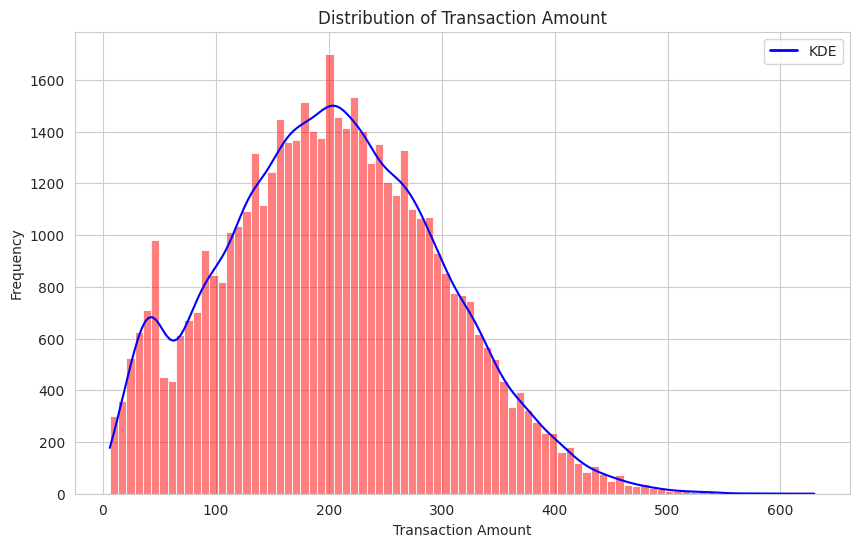

In [29]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.histplot(df['amount'], kde=True, color='red')  # Change the color of the histogram
kde_line = mlines.Line2D([], [], color='blue', linewidth=2, label='KDE')
plt.legend(handles=[kde_line])
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.gca().get_lines()[-1].set_color('blue')  # Change the color of the KDE line
plt.show()

In [30]:
def plot_distribution(column, title, xlabel, ylabel):
    sns.set_style("whitegrid")

    # Print summary statistics for the column
    print(f"\nSummary statistics for '{column}' column:")
    print(df[column].value_counts())
    print("\n")

    # Create a countplot for the column with hue and legend parameters
    ax = sns.countplot(x=column, hue=column, data=df, palette='Reds', legend=False)

    # Create a grid
    plt.grid(True)

    # Set plot title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Add count labels to the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:1.0f}'.format(height),
                ha="center")

    # Show the plot distribution
    plt.show()




Summary statistics for 'success' column:
success
0    40182
1    10228
Name: count, dtype: int64




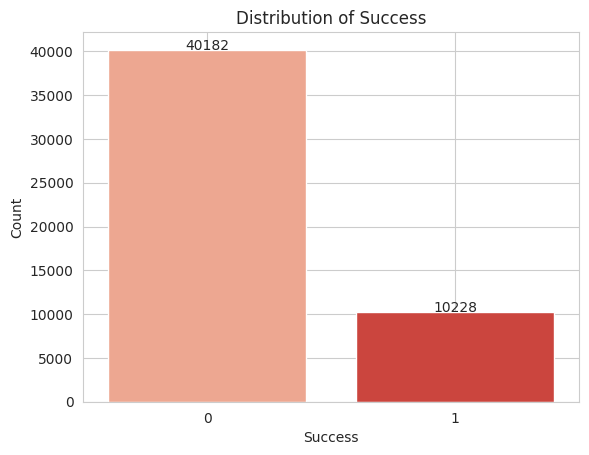

In [31]:
# Call the function for different columns
plot_distribution('success', 'Distribution of Success', 'Success', 'Count')



Summary statistics for '3D_secured' column:
3D_secured
0    38399
1    12011
Name: count, dtype: int64




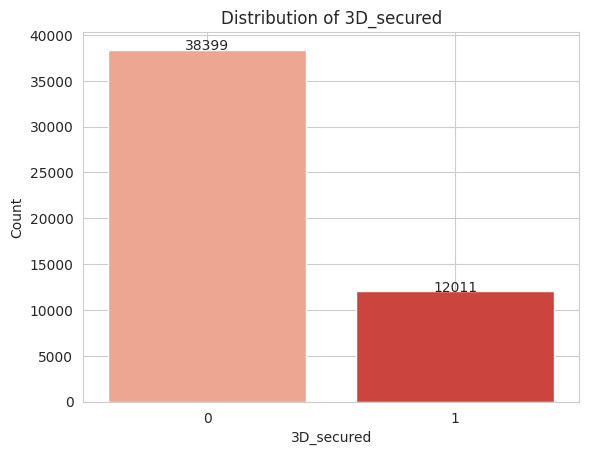

In [32]:
plot_distribution('3D_secured', 'Distribution of 3D_secured', '3D_secured', 'Count')



Summary statistics for 'country' column:
country
Germany        30233
Switzerland    10338
Austria         9839
Name: count, dtype: int64




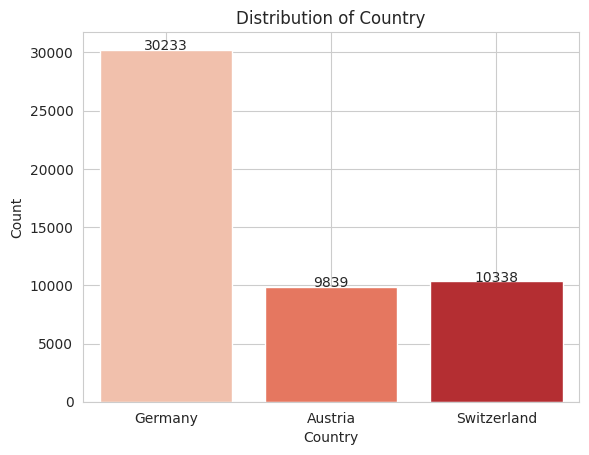

In [33]:
plot_distribution('country', 'Distribution of Country', 'Country', 'Count')



Summary statistics for 'PSP' column:
PSP
UK_Card       26459
Simplecard    12446
Moneycard      8297
Goldcard       3208
Name: count, dtype: int64




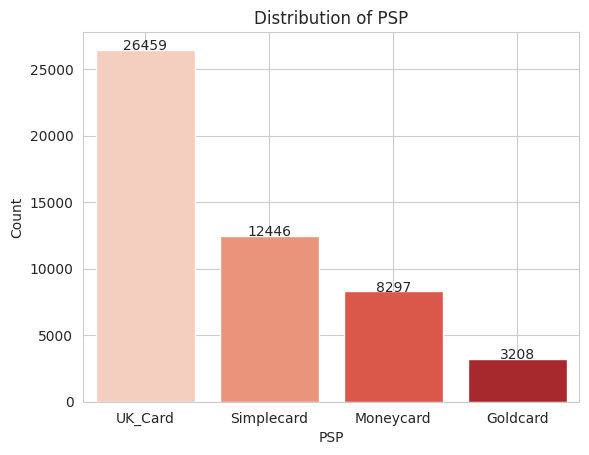

In [34]:
plot_distribution('PSP', 'Distribution of PSP', 'PSP', 'Count')



Summary statistics for 'card' column:
card
Master    29002
Visa      11640
Diners     9768
Name: count, dtype: int64




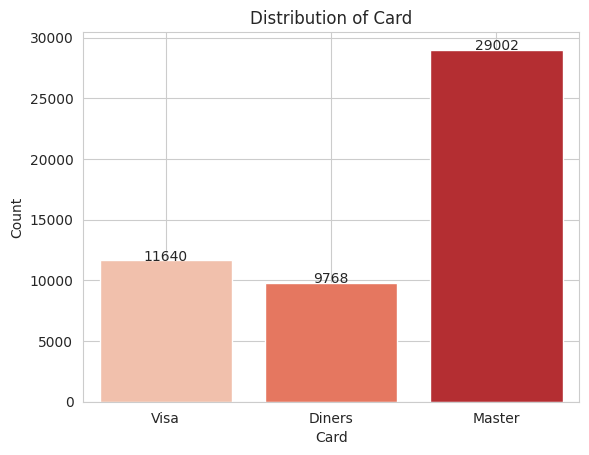

In [35]:
plot_distribution('card', 'Distribution of Card', 'Card', 'Count')

Success Rate by PSPs:

- This plot illustrates the average success rate for each Payment Service Provider (PSP). It helps in comparing the performance of different PSPs in terms of successfully processed transactions. It shows that Goldcard has the highest success rate of 40.62% and simplecard has the lowest success rate of 15.82%.

Success Rate by Cards:

- This plot shows the average success rate for each card type used in transactions. It provides insights into whether certain card types have higher success rates compared to others. It shows that Diners has the highest success rate of 22.32% and lowest success rate of 19.43%.

Success Rate by Country:

- This plot displays the average success rate for each country where transactions originate. It helps in understanding whether success rates vary significantly across different countries. It shows that switzerland has the highest success rate of 20.60% and Germany has the lowest success rate of 20.17%.


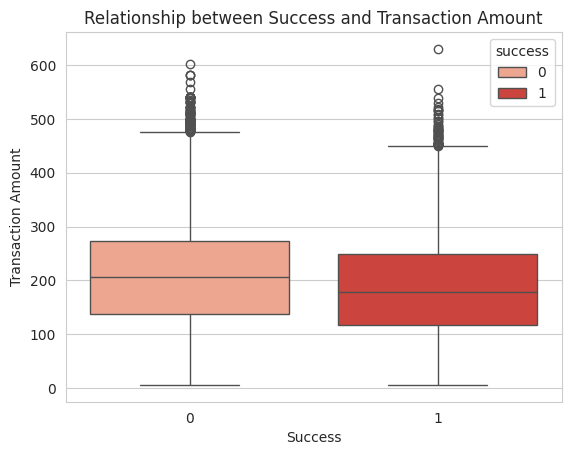

In [36]:
# Create a boxplot with 'success' on the x-axis and 'amount' on the y-axis
sns.boxplot(x='success', y='amount', data=df, palette='Reds', hue='success')

# Set plot title and axis labels
plt.title('Relationship between Success and Transaction Amount')
plt.xlabel('Success')
plt.ylabel('Transaction Amount')

# Show the plot relationship between success and transaction amount
plt.show()

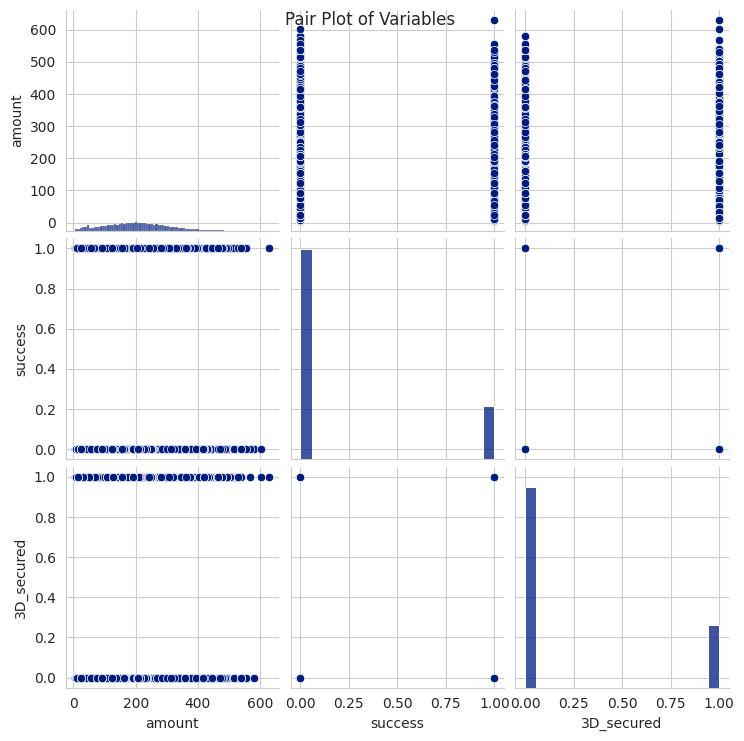

In [37]:


# Set the default color palette for seaborn to 'Dark'
sns.set_palette('dark')

# Create a pair plot for the selected variables
pair_plot = sns.pairplot(df[['amount', 'success', '3D_secured']])

# Set the overall title for the pair plot
pair_plot.fig.suptitle('Pair Plot of Variables')

# Show the plot
plt.show()

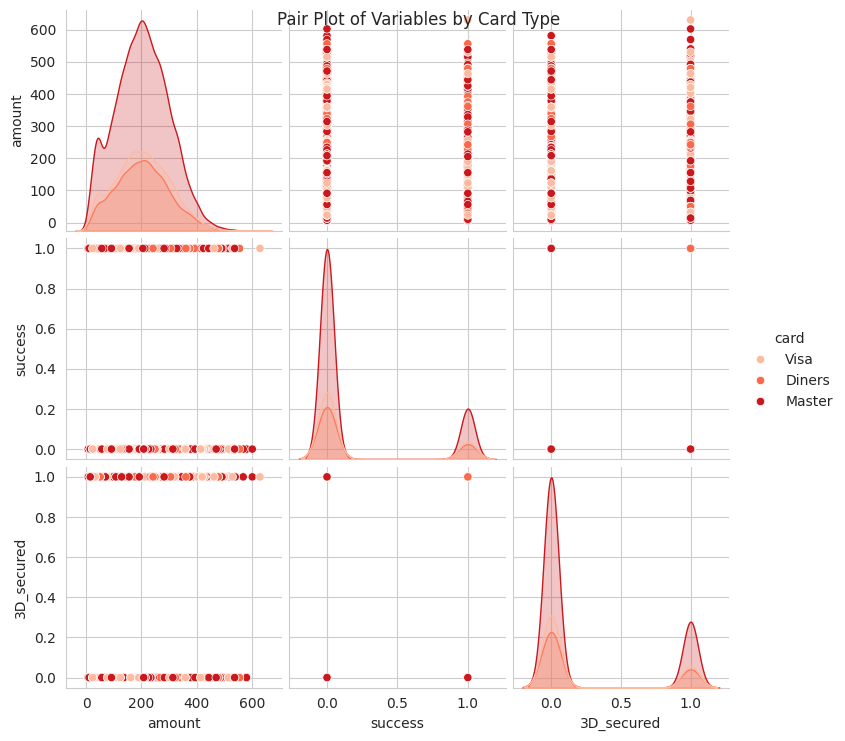

In [38]:
# Create a pair plot for the 'amount', 'success', and '3D_secured' variables
# with hue based on the 'card' variable
sns.pairplot(df, hue='card', vars=['amount', 'success', '3D_secured'],
             palette='Reds')

# Set the overall title for the pair plot
plt.suptitle('Pair Plot of Variables by Card Type')

# Show the plot
plt.show()

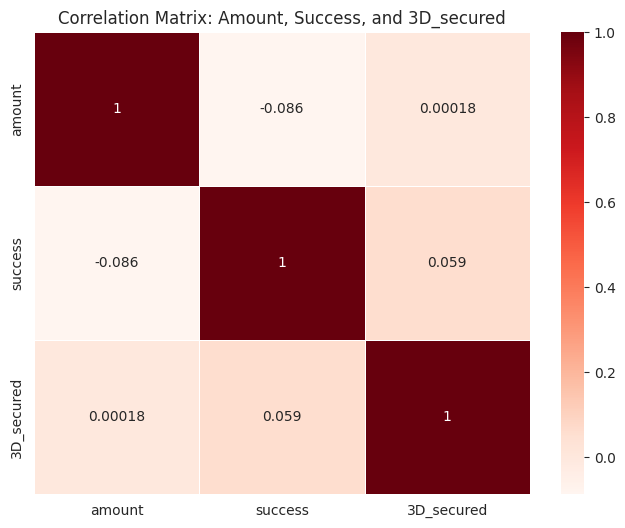

In [39]:
# Select relevant columns for correlation analysis
selected_columns = ['amount', 'success', '3D_secured']
# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', linewidths=.5)
# Set plot title
plt.title('Correlation Matrix: Amount, Success, and 3D_secured')
# Show the plot
plt.show()



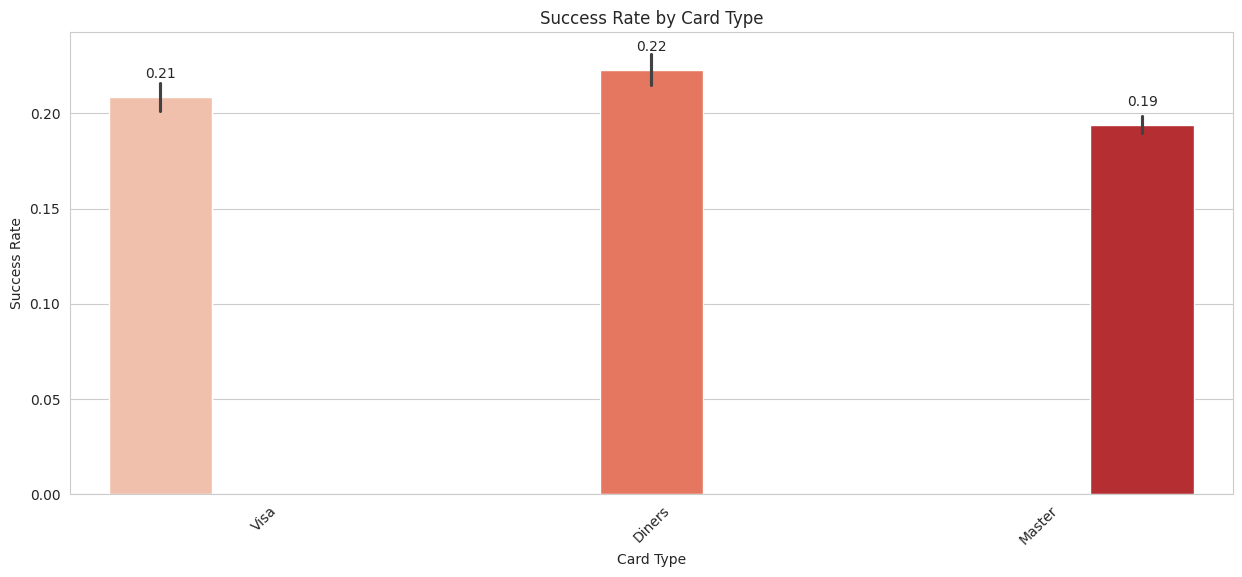

In [40]:
# Create a bar plot to visualize success rate by card type
fig, ax = plt.subplots(figsize=(15, 6))

# Use a bar plot with 'card' on the x-axis, 'success' on the y-axis, and no confidence interval (errorbar=None)
barplot = sns.barplot(x='card', y='success', hue='card', data=df, dodge=True, palette='Reds', ax=ax, legend=False)

# Set plot title and axis labels
plt.title('Success Rate by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Success Rate')

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=45)

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.01,  # Adjust this value for vertical position of the label
            f'{height:.2f}',  # Format the label as needed
            ha="center")

# Show the plot
plt.show()


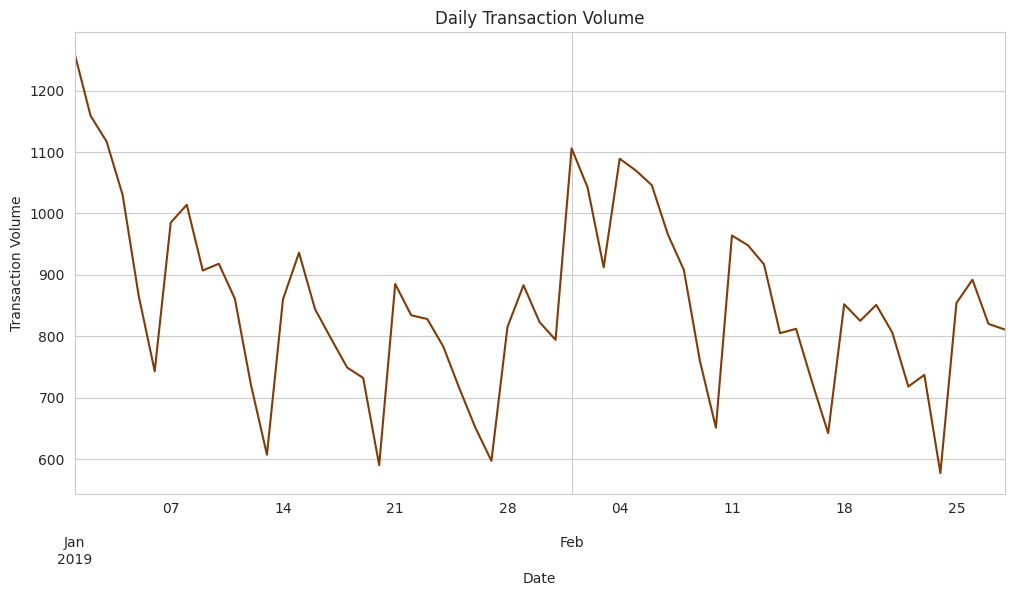

In [41]:
# Convert 'tmsp' column to datetime format
df['tmsp'] = pd.to_datetime(df['tmsp'])

# Set 'tmsp' as the index of the DataFrame
df.set_index('tmsp', inplace=True)

# Resample the data by day and plot the daily transaction volume
df.resample('D').size().plot(title='Daily Transaction Volume', figsize=(12, 6), cmap='PuOr')

# Set x-axis and y-axis labels
plt.xlabel('Date')
plt.ylabel('Transaction Volume')

# Show the plot
plt.show()

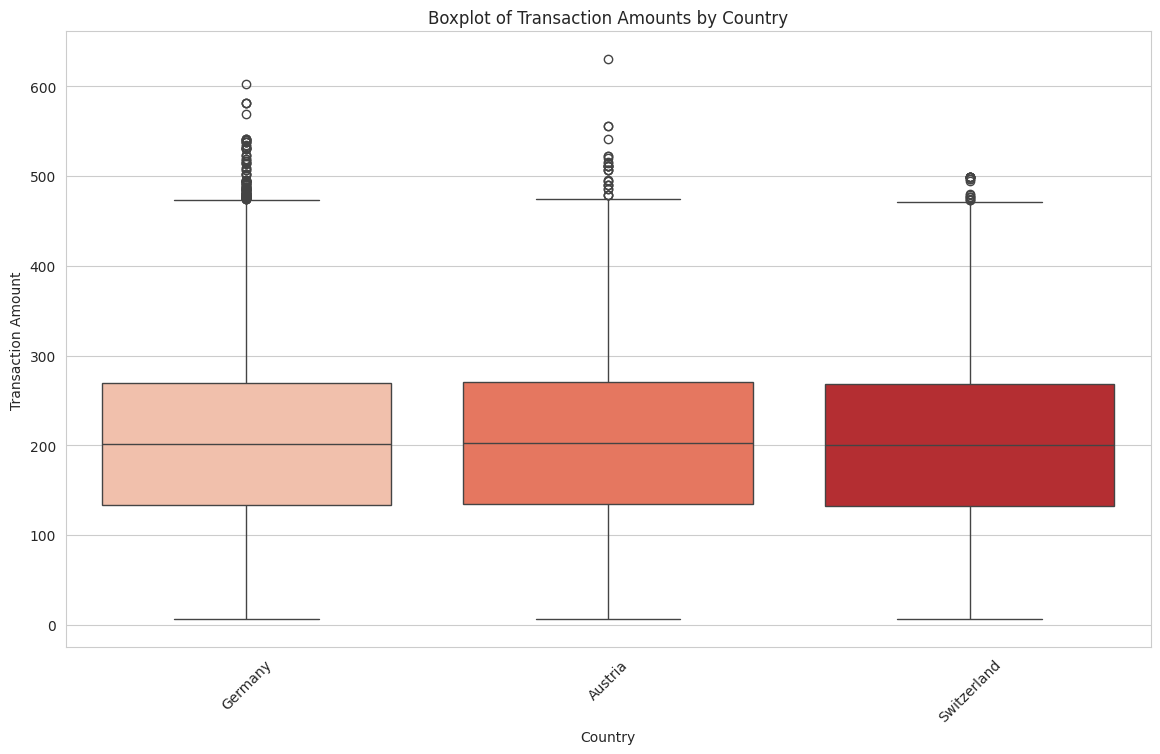

In [42]:
# Create a boxplot to visualize transaction amounts by country
plt.figure(figsize=(14, 8))
# Use a boxplot with 'country' on the x-axis and 'amount' on the y-axis
sns.boxplot(x='country', y='amount', data=df, palette='Reds', hue='country')
# Set plot title, axis labels, and rotate x-axis labels for better readability
plt.title('Boxplot of Transaction Amounts by Country')
plt.xlabel('Country')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
# Show the plot
plt.show()


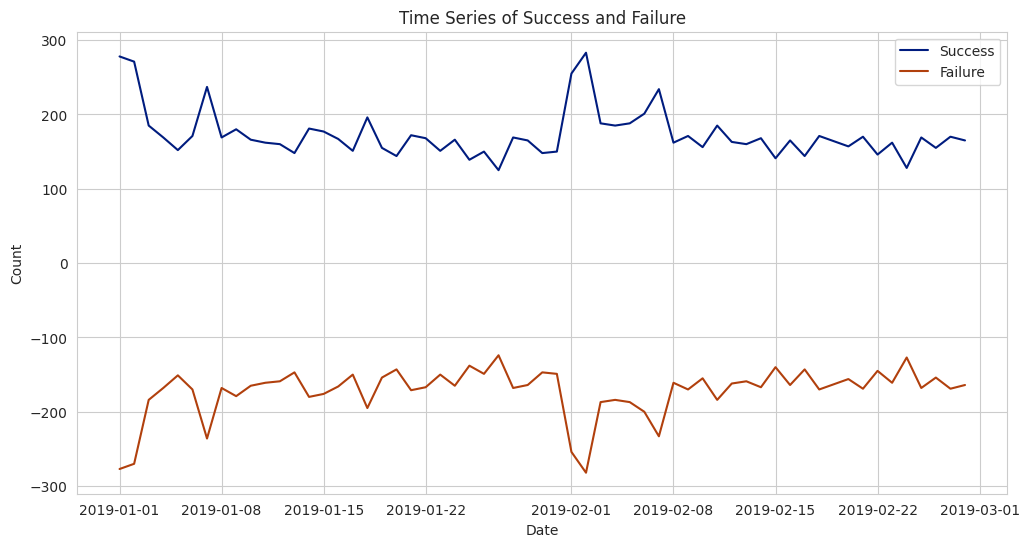

In [43]:
# Resample the DataFrame by day and calculate the sum for each day
df_resampled = df.resample('D').sum()
# Create a line plot for success and failure over time
plt.figure(figsize=(12, 6))
# Use lineplot to plot 'success' and 'failure' against the resampled dates
sns.lineplot(x=df_resampled.index, y='success', data=df_resampled, label='Success')
sns.lineplot(x=df_resampled.index, y=1 - df_resampled['success'], label='Failure')
# Set plot title, x-axis label, y-axis label, and add legend
plt.title('Time Series of Success and Failure')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
# Show the plot
plt.show()

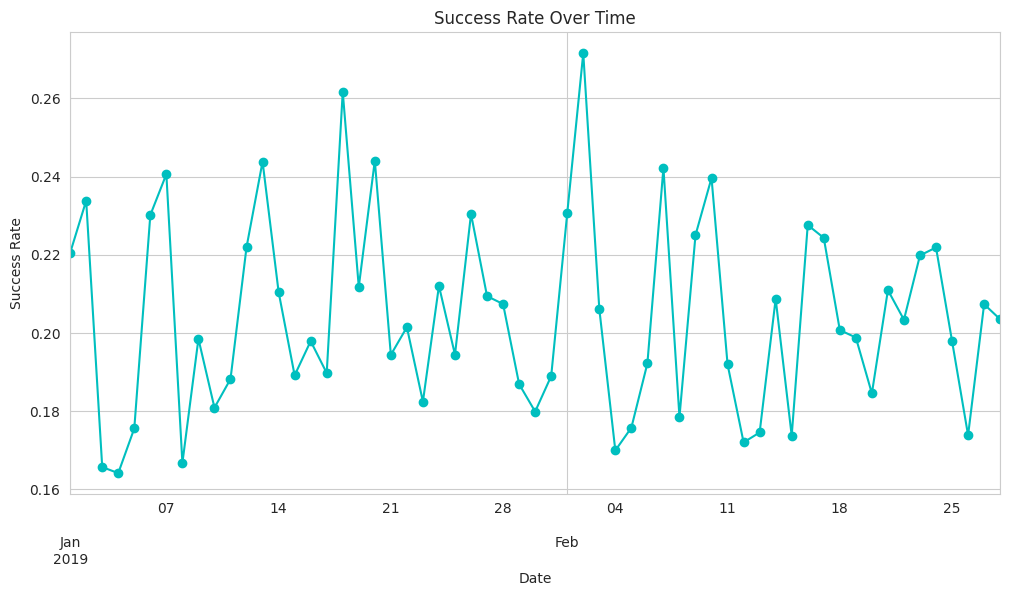

In [44]:
# Create a figure
plt.figure(figsize=(12, 6))
# Calculate the daily success rate and plot it over time
success_rate_by_date = df.resample('D')['success'].mean()
# Use a line plot with markers to visualize the success rate over time
success_rate_by_date.plot(marker='o', linestyle='-', color='color'[0])
# Set plot title, x-axis label, y-axis label
plt.title('Success Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Success Rate')
# Show the plot
plt.show()

In [45]:

def process_transaction_fees(df):
    # Reset the index of the DataFrame
    df.reset_index(inplace=True)

    # Define dictionaries for mapping success and failure transaction fees based on card type
    success_fee_mapping = {
        'Moneycard': 5,
        'Goldcard': 10,
        'UK_Card': 3,
        'Simplecard': 1
    }
    failed_fee_mapping = {
        'Moneycard': 2,
        'Goldcard': 5,
        'UK_Card': 1,
        'Simplecard': 0.5
    }

    # Create a new column 'transaction_fee' based on success or failure, using np.where
    df['transaction_fee'] = np.where(df['success'] == 1, df['PSP'].map(success_fee_mapping),
                                      df['PSP'].map(failed_fee_mapping))

    # Print the first few rows of the updated DataFrame
    print("Associated the service fees of Payment Service Providers (PSPs) with the dataset under the column identifier 'transaction_fee' \n")
    print(df.head())

# Call the function with your DataFrame
process_transaction_fees(df)


Associated the service fees of Payment Service Providers (PSPs) with the dataset under the column identifier 'transaction_fee' 

                 tmsp  country  amount  success         PSP  3D_secured  \
0 2019-01-01 00:01:11  Germany      89        0     UK_Card           0   
1 2019-01-01 00:01:17  Germany      89        1     UK_Card           0   
2 2019-01-01 00:02:49  Germany     238        0     UK_Card           1   
3 2019-01-01 00:03:13  Germany     238        1     UK_Card           1   
4 2019-01-01 00:04:33  Austria     124        0  Simplecard           0   

     card  transaction_fee  
0    Visa              1.0  
1    Visa              3.0  
2  Diners              1.0  
3  Diners              3.0  
4  Diners              0.5  


In [46]:
# Convert 'tmsp' column to datetime format
df['tmsp'] = pd.to_datetime(df['tmsp'])
# Add 'day_of_week' column with numerical mapping (Monday 0, ..., Sunday 6)
df['day_of_week'] = df['tmsp'].dt.dayofweek
# Add 'minute_of_day' column
df['minute_of_day'] = df['tmsp'].dt.hour * 60 + df['tmsp'].dt.minute
# Print the first few rows of the updated DataFrame
print(df.head())

                 tmsp  country  amount  success         PSP  3D_secured  \
0 2019-01-01 00:01:11  Germany      89        0     UK_Card           0   
1 2019-01-01 00:01:17  Germany      89        1     UK_Card           0   
2 2019-01-01 00:02:49  Germany     238        0     UK_Card           1   
3 2019-01-01 00:03:13  Germany     238        1     UK_Card           1   
4 2019-01-01 00:04:33  Austria     124        0  Simplecard           0   

     card  transaction_fee  day_of_week  minute_of_day  
0    Visa              1.0            1              1  
1    Visa              3.0            1              1  
2  Diners              1.0            1              2  
3  Diners              3.0            1              3  
4  Diners              0.5            1              4  


In [47]:
# Sort the DataFrame by 'country', 'amount', 'day_of_week', 'minute_of_day'
df.sort_values(by=['country', 'amount', 'minute_of_day'], inplace=True)
# Create a new column 'payment_attempts' and initialize it with 1
df['payment_attempts'] = 1
# Identify rows where consecutive attempts have the same 'country', 'amount', 'day_of_week',and 'minute_of_day'
# Increment the 'payment_attempts' for those rows
df['payment_attempts'] = df.groupby(['country', 'amount', 'minute_of_day']).cumcount() + 1
# Reset the DataFrame index
df.reset_index(drop=True, inplace=True)
# Display the updated DataFrame
print("Dataset Post Data Transformation \n")

print(df.head())

Dataset Post Data Transformation 

                 tmsp  country  amount  success         PSP  3D_secured  \
0 2019-01-10 03:49:12  Austria       6        0   Moneycard           0   
1 2019-01-10 03:49:37  Austria       6        0  Simplecard           0   
2 2019-02-08 05:02:33  Austria       6        0     UK_Card           0   
3 2019-02-08 05:02:37  Austria       6        0     UK_Card           0   
4 2019-02-08 05:02:39  Austria       6        0  Simplecard           0   

     card  transaction_fee  day_of_week  minute_of_day  payment_attempts  
0  Diners              2.0            3            229                 1  
1  Diners              0.5            3            229                 2  
2  Diners              1.0            4            302                 1  
3  Diners              1.0            4            302                 2  
4  Diners              0.5            4            302                 3  


In [48]:
# Drop the 'tmsp' column
df.drop('tmsp', axis=1, inplace=True)
print("Updated dataset after feature selection")
print(df.head())

Updated dataset after feature selection
   country  amount  success         PSP  3D_secured    card  transaction_fee  \
0  Austria       6        0   Moneycard           0  Diners              2.0   
1  Austria       6        0  Simplecard           0  Diners              0.5   
2  Austria       6        0     UK_Card           0  Diners              1.0   
3  Austria       6        0     UK_Card           0  Diners              1.0   
4  Austria       6        0  Simplecard           0  Diners              0.5   

   day_of_week  minute_of_day  payment_attempts  
0            3            229                 1  
1            3            229                 2  
2            4            302                 1  
3            4            302                 2  
4            4            302                 3  



                    count      mean       std  min  25%  50%  75%   max
transaction_fee  50410.0  1.756477  1.814051  0.5  1.0  1.0  2.0  10.0 



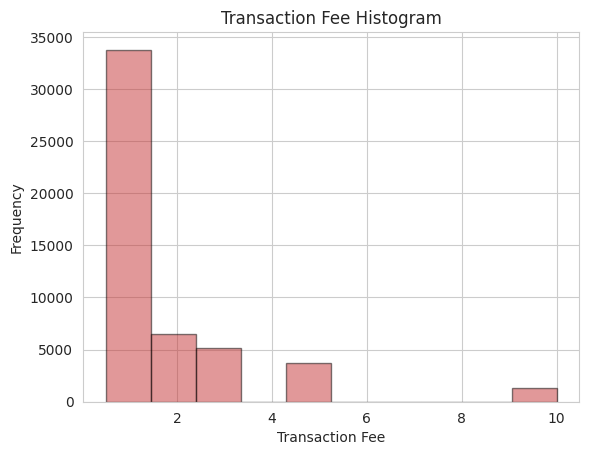

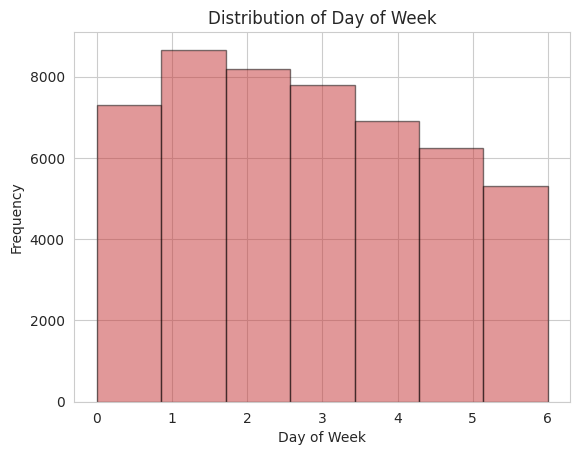

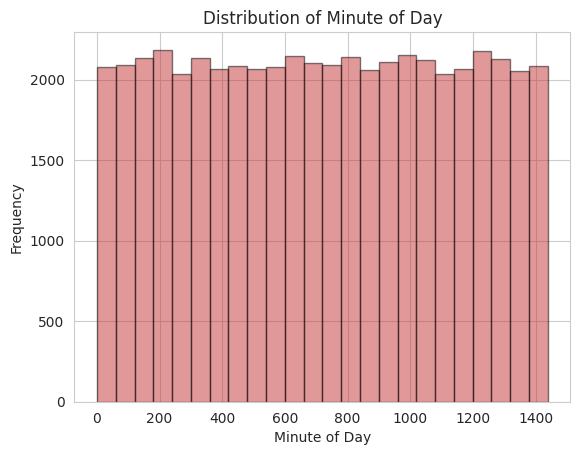

payment_attempts
1    37227
2    10463
3     2228
4      412
5       67
6       10
7        3
Name: count, dtype: int64


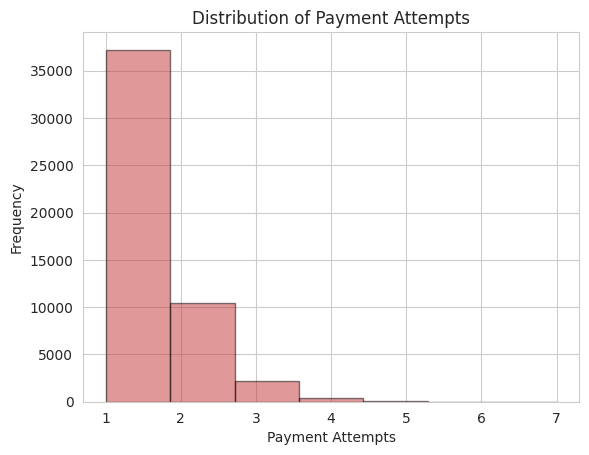

In [49]:

def visualize_data(df):
    # Select numeric columns for summary statistics
    numeric_columns = ['transaction_fee']

    # Calculate descriptive statistics for numeric columns
    numeric_summary = df[numeric_columns].describe()

    # Transpose the summary for better readability
    transposed_summary = numeric_summary.transpose()

    # Print the transposed summary
    print("\n", transposed_summary, "\n")

    # Create a histogram to visualize the distribution of transaction fees
    plt.hist(df['transaction_fee'], bins=10, edgecolor='black', color=sns.color_palette("coolwarm_r", 20)[0],
             alpha=0.5)

    # Set plot title, x-axis label, y-axis label
    plt.title('Transaction Fee Histogram')
    plt.xlabel('Transaction Fee')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

    # Create a histogram to visualize the distribution of 'day_of_week'
    plt.hist(df['day_of_week'], bins=7, edgecolor='black', color=sns.color_palette("coolwarm_r", 20)[0], alpha=0.5)

    # Set x-axis label, y-axis label, and plot title
    plt.xlabel('Day of Week')
    plt.ylabel('Frequency')
    plt.title('Distribution of Day of Week')

    # Show the plot
    plt.show()

    # Create a histogram to visualize the distribution of 'minute_of_day'
    plt.hist(df['minute_of_day'], bins=24, edgecolor='black', color=sns.color_palette("coolwarm_r", 20)[0],
             alpha=0.5)

    # Set x-axis label, y-axis label, and plot title
    plt.xlabel('Minute of Day')
    plt.ylabel('Frequency')
    plt.title('Distribution of Minute of Day')

    # Show the plot
    plt.show()

    # Count the occurrences of each value in the 'payment_attempts' column and sort by index
    attempt_counts = df['payment_attempts'].value_counts().sort_index()

    # Print the count of payment attempts for each value
    print(attempt_counts)

    # Create a histogram to visualize the distribution of 'payment_attempts'
    plt.hist(df['payment_attempts'], bins=7, edgecolor='black', color=sns.color_palette("coolwarm_r", 20)[0],
             alpha=0.5)

    # Set x-axis label, y-axis label, and plot title
    plt.xlabel('Payment Attempts')
    plt.ylabel('Frequency')
    plt.title('Distribution of Payment Attempts')

    # Show the plot
    plt.show()

# Call the function with your DataFrame
visualize_data(df)


In [50]:
# Examine unique values in 'country' column
unique_countries = df['country'].unique()
print("Unique values in 'country' column:", unique_countries)
# Examine unique values in 'PSP' column
unique_psps = df['PSP'].unique()
print("Unique values in 'PSP' column:", unique_psps)
# Examine unique values in 'card' column
unique_cards = df['card'].unique()
print("Unique values in 'card' column:", unique_cards)

Unique values in 'country' column: ['Austria' 'Germany' 'Switzerland']
Unique values in 'PSP' column: ['Moneycard' 'Simplecard' 'UK_Card' 'Goldcard']
Unique values in 'card' column: ['Diners' 'Master' 'Visa']


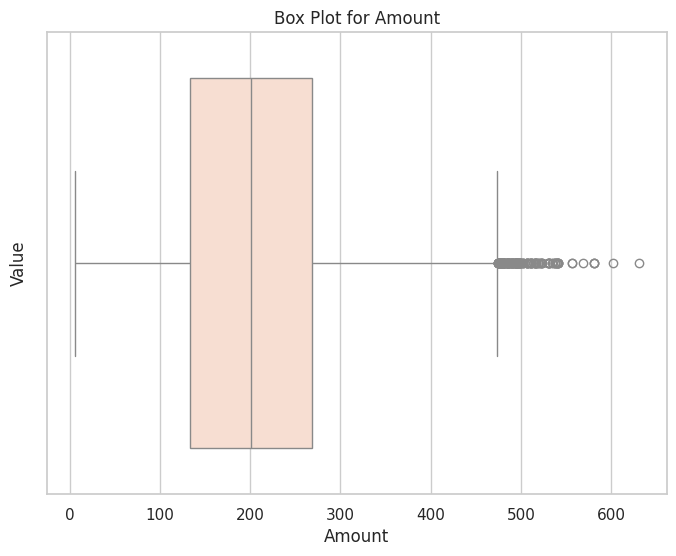

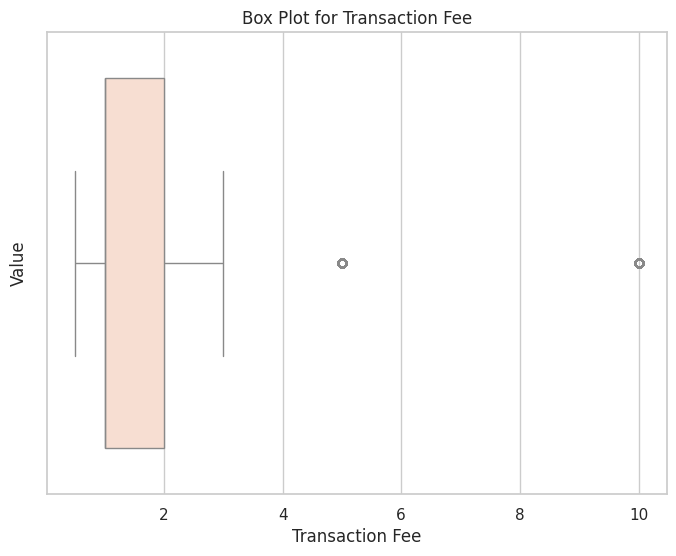

In [51]:
sns.set(style="whitegrid")

# Set the palette to 'Reds'
palette='Reds'
sns.set_palette(palette)

# Box plot for 'amount'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['amount'] )
plt.title('Box Plot for Amount')
plt.xlabel('Amount')
plt.ylabel('Value')
plt.show()
# Box plot for 'transaction_fee'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['transaction_fee'])
plt.title('Box Plot for Transaction Fee')
plt.xlabel('Transaction Fee')
plt.ylabel('Value')
plt.show()

In [52]:
# Set a threshold for identifying rare categories
threshold = 10
# Identify rare categories for 'country', 'PSP', and 'card'
rare_country = df['country'].value_counts()[df['country'].value_counts() < threshold].index
rare_PSP = df['PSP'].value_counts()[df['PSP'].value_counts() < threshold].index
rare_card = df['card'].value_counts()[df['card'].value_counts() < threshold].index
# Print the rare categories
print("Rare countries:", rare_country)
print("Rare PSPs:", rare_PSP)
print("Rare cards:", rare_card)

Rare countries: Index([], dtype='object', name='country')
Rare PSPs: Index([], dtype='object', name='PSP')
Rare cards: Index([], dtype='object', name='card')


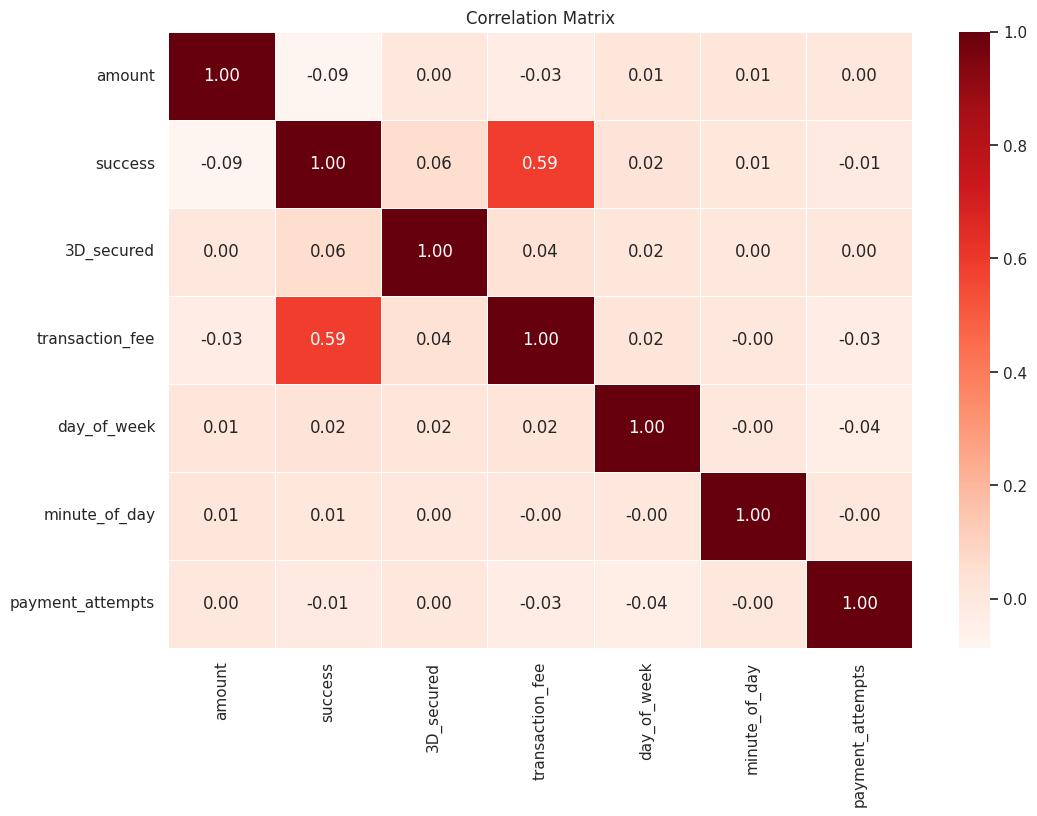

In [53]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude='number').columns

# Drop non-numeric columns before calculating correlation
correlation_matrix = df.drop(columns=non_numeric_columns).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# Developing Model

In [54]:
#Developing Model
# Create a copy of the DataFrame
df_1 = df.copy()
# Drop the 'transaction_fee' column from the copied DataFrame
#df_1 = df_1.drop(['PSP'], axis=1)
df_1 = df_1.drop('transaction_fee', axis=1)
# Print the modified DataFrame without the 'transaction_fee' column
print(df_1)
df_encoded_1 = pd.get_dummies(df_1, columns=['country', 'card'])

           country  amount  success         PSP  3D_secured    card  \
0          Austria       6        0   Moneycard           0  Diners   
1          Austria       6        0  Simplecard           0  Diners   
2          Austria       6        0     UK_Card           0  Diners   
3          Austria       6        0     UK_Card           0  Diners   
4          Austria       6        0  Simplecard           0  Diners   
...            ...     ...      ...         ...         ...     ...   
50405  Switzerland     499        0     UK_Card           0  Master   
50406  Switzerland     499        0     UK_Card           0  Master   
50407  Switzerland     499        0     UK_Card           0  Master   
50408  Switzerland     499        0     UK_Card           0  Master   
50409  Switzerland     499        0     UK_Card           0  Master   

       day_of_week  minute_of_day  payment_attempts  
0                3            229                 1  
1                3            229      

Baseline Model


The baseline model is a simple linear regression model. It assumes that the relationship between the dependent variable and independent variables can be described by a
The baseline model is a simple linear regression model with no interaction terms.

In [55]:

def evaluate_model(model, X_scaled, y, set_name):
    """
    Evaluate the performance of a model on a given dataset.

    Parameters:
    model (object): A trained model object.
    X_scaled (array): The scaled features of the dataset.
    y (array): The target variable of the dataset.
    set_name (str): The name of the dataset (e.g., 'Training', 'Testing').

    Returns:
    None
    """

    # Make predictions using the model
    y_pred = model.predict(X_scaled)

    # Get the predicted probabilities for each class
    y_pred_proba = model.predict_proba(X_scaled)[:, 1]

    # Calculate the precision, recall, F1-score, and AUC-ROC
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)

    # Calculate the accura
    accuracy = accuracy_score(y, y_pred)

    # Get the confusion matrix
    conf_matrix = confusion_matrix(y, y_pred)

    # Print the model performance metrics
    print(f'\n{"="*20} {type(model).__name__} {"="*20}\n')
    print(f'Model Performance on {set_name} set - {type(model).__name__}:')
    print('\n')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'AUC-ROC: {roc_auc:.4f}')
    print(f'\n{"="*20}{"="*20}\n')
    print(classification_report(y, y_pred))

     # Calculate and print confusion matrix
    cm = confusion_matrix(y, y_pred)
    cm_df1 = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)
    print(f'\n{"="*20}{"="*20}\n')
    print("Confusion Matrix:")
    print(cm_df1)
    plt.figure()
    plt.imshow(cm_df1, cmap='Reds')
    plt.title(f'Confusion Matrix: {set_name} - {type(model).__name__}')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()
    plt.show()

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y, y_pred)
    plt.figure(figsize=(7, 5))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='AUC = %0.4f' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


==================== KNeighborsClassifier ====================

Model Performance on validation set set - KNeighborsClassifier:


Accuracy: 0.7713
Precision: 0.2525
Recall: 0.0746
F1-Score: 0.1151
AUC-ROC: 0.5098


              precision    recall  f1-score   support

           0       0.80      0.94      0.87      4035
           1       0.25      0.07      0.12      1006

    accuracy                           0.77      5041
   macro avg       0.53      0.51      0.49      5041
weighted avg       0.69      0.77      0.72      5041



Confusion Matrix:
      0    1
0  3813  222
1   931   75


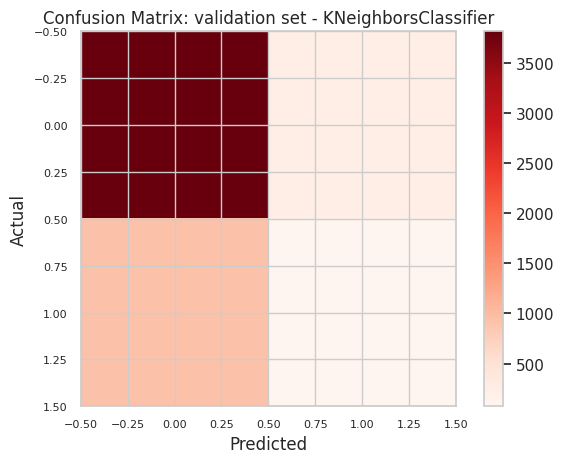

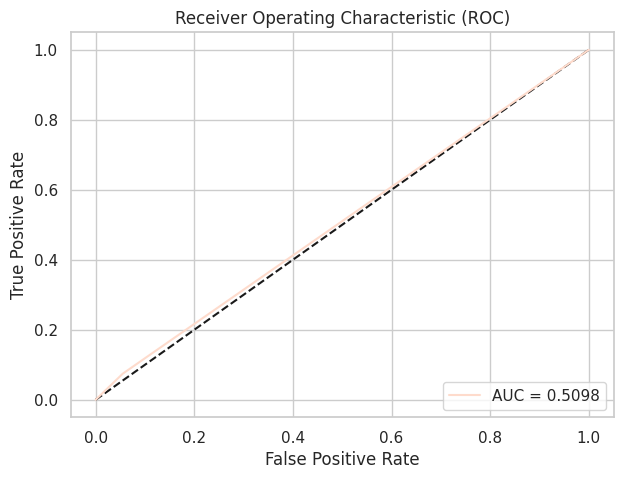


==================== KNeighborsClassifier ====================

Model Performance on test set set - KNeighborsClassifier:


Accuracy: 0.7590
Precision: 0.2137
Recall: 0.0526
F1-Score: 0.0844
AUC-ROC: 0.5004


              precision    recall  f1-score   support

           0       0.79      0.95      0.86      3976
           1       0.21      0.05      0.08      1065

    accuracy                           0.76      5041
   macro avg       0.50      0.50      0.47      5041
weighted avg       0.67      0.76      0.70      5041



Confusion Matrix:
      0    1
0  3770  206
1  1009   56


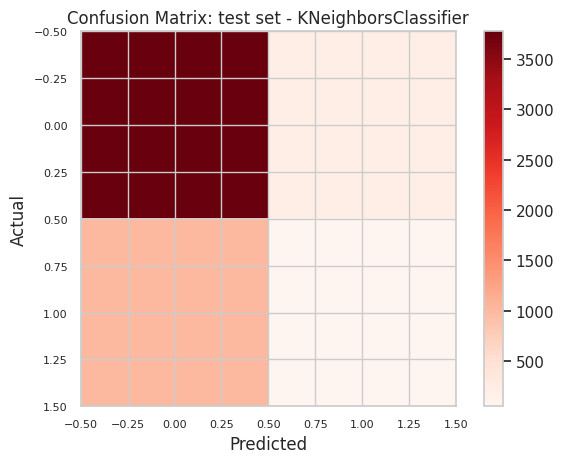

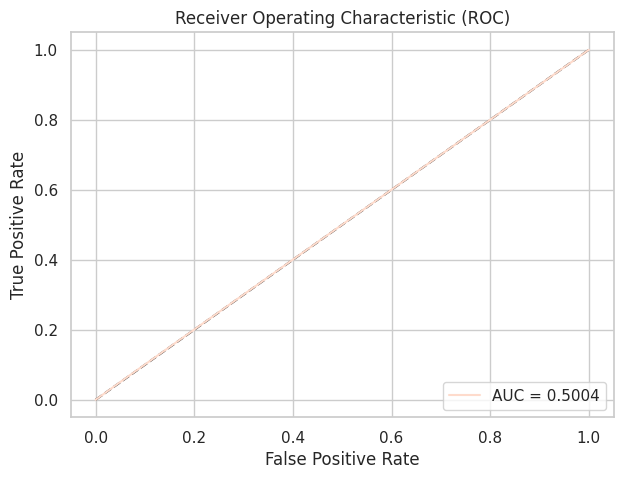

In [56]:

# Encode categorical variables using one-hot encoding
df_1_encoded = pd.get_dummies(df_1, columns=['country', 'PSP', 'card'])
# Split the dataset into train, validation, and test sets
#X_original = df_1_encoded.drop('success', axis=1)
X_original = df_1_encoded.drop('success', axis=1)
y_original = df_1_encoded['success']
X_train_original, X_temp_original, y_train_original, y_temp_original = train_test_split(X_original,y_original, test_size=0.2, random_state=42)
X_validation_original, X_test_original, y_validation_original, y_test_original =train_test_split(X_temp_original, y_temp_original, test_size=0.5, random_state=42)

# Create and train a baseline KNN model
baseline_knn_model = KNeighborsClassifier()
baseline_knn_model.fit(X_train_original, y_train_original)


# Evaluate the model on the validation set
evaluate_model(baseline_knn_model, X_validation_original, y_validation_original, "validation set")
# Evaluate the model on the test set
evaluate_model(baseline_knn_model, X_test_original, y_test_original, "test set")


In [57]:
# Encode categorical variables using one-hot encoding
df_1 = pd.get_dummies(df_1, columns=['country', 'PSP', 'card'])
# Print the DataFrame after one-hot encoding
print(df_1)

# Drop the target variable 'success' from the features
X = df_1.drop('success', axis=1)
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the features using StandardScaler
X_scaled = scaler.fit_transform(X)
# Create a DataFrame with scaled features and include the 'success' column
df_1_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_1_scaled['success'] = df_1['success']
# Print the DataFrame with scaled features
print(df_1_scaled)
#Extract features and target variable for SMOTE
X_smote = df_1_scaled.drop('success', axis=1)
y_smote = df_1_scaled['success']
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_smote, y_smote)
# Create a new DataFrame with the resampled features and the target variable
df_1_resampled = pd.DataFrame(X_resampled, columns=X_smote.columns)
df_1_resampled['success'] = y_resampled
# Display the updated DataFrame with SMOTE
print(df_1_resampled)
# Development of Model A
# Split the resampled dataset into features (X_1) and target variable (y_1)
X_1 = df_1_resampled.drop('success', axis=1)
y_1 = df_1_resampled['success']
# Split the dataset into train, validation, and test sets
X_train_1, X_temp, y_train_1, y_temp = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
X_valid_1, X_test_1, y_valid_1, y_test_1 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Initialize a StandardScaler and scale the features for training, validation, and test sets
scaler = StandardScaler()
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_valid_scaled_1 = scaler.transform(X_valid_1)
X_test_scaled_1 = scaler.transform(X_test_1)

       amount  success  3D_secured  day_of_week  minute_of_day  \
0           6        0           0            3            229   
1           6        0           0            3            229   
2           6        0           0            4            302   
3           6        0           0            4            302   
4           6        0           0            4            302   
...       ...      ...         ...          ...            ...   
50405     499        0           0            3            247   
50406     499        0           0            3            247   
50407     499        0           0            3            248   
50408     499        0           0            3            248   
50409     499        0           0            3            249   

       payment_attempts  country_Austria  country_Germany  \
0                     1             True            False   
1                     2             True            False   
2                     1 

In [58]:
def calculate_classification_metrics(y_true, y_pred, y_pred_proba):
    """
    Calculate various classification metrics and display results.

    Parameters:
    y_true (array): True labels.
    y_pred (array): Predicted labels.
    y_pred_proba (array): Predicted probabilities for positive class.

    Returns:
    dict: Dictionary containing calculated metrics.
    """
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    accuracy = accuracy_score(y_true, y_pred)

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': roc_auc
    }

    print("Classification Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


    return metrics

In [59]:
def evaluate_model(model, X_scaled, y, set_name):
    """
    Evaluate the performance of a model on a given dataset.

    Parameters:
    model (object): A trained model object.
    X_scaled (array): The scaled features of the dataset.
    y (array): The target variable of the dataset.
    set_name (str): The name of the dataset (e.g., 'Training', 'Testing').

    Returns:
    None
    """
    print(f'Model Performance on {set_name} set - {type(model).__name__}:')
    print("\n")
    y_pred = model.predict(X_scaled)
    y_pred_proba = model.predict_proba(X_scaled)[:, 1]
    calculate_classification_metrics(y, y_pred, y_pred_proba)
    conf_matrix = confusion_matrix(y, y_pred)
    cm_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)

    print(f'\n{"="*20}{"="*20}\n')
    print(f'Classification Report: {set_name} set - {type(model).__name__}  \n')
    print(classification_report(y, y_pred))
    print(f'\n{"="*20}{"="*20}\n')
    print(f"Confusion Matrix: {set_name} set - {type(model).__name__} ")
    print(cm_df)
    print(f'\n{"="*20}{"="*20}\n')
    plt.figure()
    plt.imshow(cm_df, cmap='Reds')
    plt.title(f'Confusion Matrix: {set_name} set - {type(model).__name__}')
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()
    plt.show()

    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    plt.figure(figsize=(7, 5))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y, y_pred_proba):.4f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC)Curve - {set_name} set')
    plt.legend(loc="lower right")
    plt.show()


In [60]:
# Model Training and Evaluation
def train_and_evaluate_model(model, X_train_scaled, y_train, X_valid_scaled, y_valid, X_test_scaled, y_test):
    model.fit(X_train_scaled, y_train)

    print(f'\n{"="*20} {type(model).__name__} {"="*20}\n')

    print("Validation Set Evaluation:")
    evaluate_model(model, X_valid_scaled, y_valid, "Validation")

    print("Test Set Evaluation:")
    evaluate_model(model, X_test_scaled, y_test, "Test")


==================== LogisticRegression ====================

Validation Set Evaluation:
Model Performance on Validation set - LogisticRegression:


Classification Metrics:
Accuracy: 0.5870
Precision: 0.5951
Recall: 0.5269
F1-Score: 0.5589
AUC-ROC: 0.6197


Classification Report: Validation set - LogisticRegression  

              precision    recall  f1-score   support

           0       0.58      0.65      0.61      4045
           1       0.60      0.53      0.56      3991

    accuracy                           0.59      8036
   macro avg       0.59      0.59      0.59      8036
weighted avg       0.59      0.59      0.59      8036



Confusion Matrix: Validation set - LogisticRegression 
      0     1
0  2614  1431
1  1888  2103




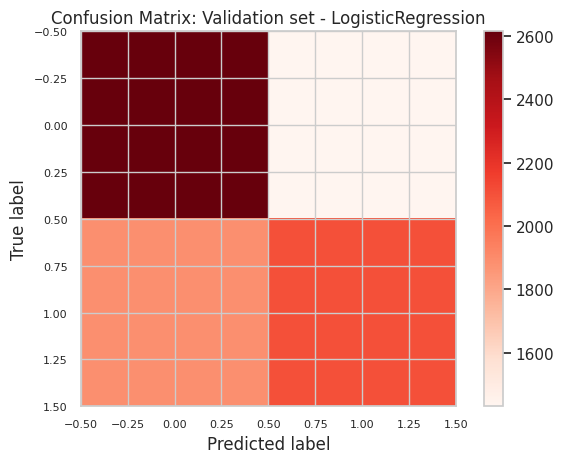

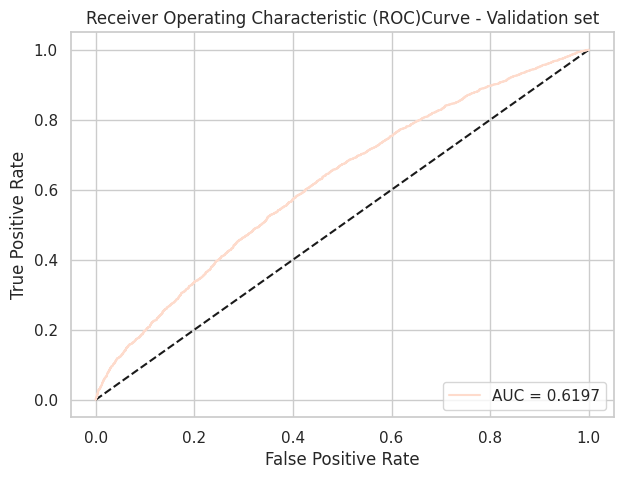

Test Set Evaluation:
Model Performance on Test set - LogisticRegression:


Classification Metrics:
Accuracy: 0.5786
Precision: 0.5861
Recall: 0.5316
F1-Score: 0.5575
AUC-ROC: 0.6131


Classification Report: Test set - LogisticRegression  

              precision    recall  f1-score   support

           0       0.57      0.63      0.60      4023
           1       0.59      0.53      0.56      4014

    accuracy                           0.58      8037
   macro avg       0.58      0.58      0.58      8037
weighted avg       0.58      0.58      0.58      8037



Confusion Matrix: Test set - LogisticRegression 
      0     1
0  2516  1507
1  1880  2134




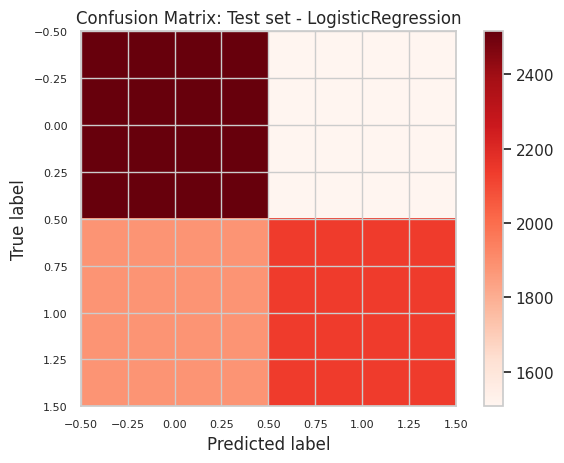

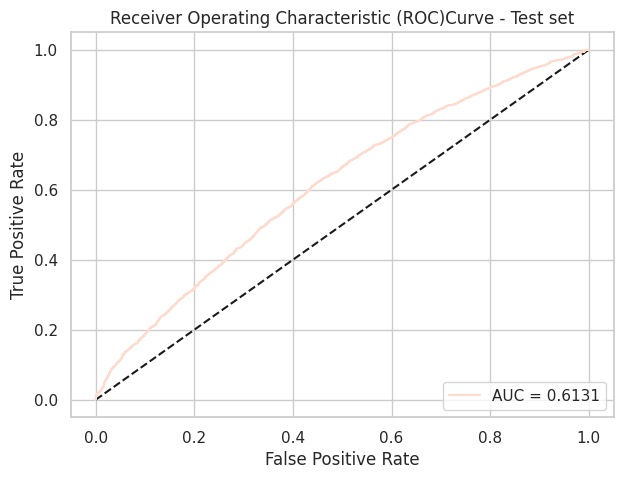

In [61]:
# Logistic Regression
log_reg_model = LogisticRegression(random_state=42)
train_and_evaluate_model(log_reg_model, X_train_scaled_1, y_train_1, X_valid_scaled_1, y_valid_1, X_test_scaled_1, y_test_1)



==================== DecisionTreeClassifier ====================

Validation Set Evaluation:
Model Performance on Validation set - DecisionTreeClassifier:


Classification Metrics:
Accuracy: 0.7522
Precision: 0.7510
Recall: 0.7497
F1-Score: 0.7503
AUC-ROC: 0.7522


Classification Report: Validation set - DecisionTreeClassifier  

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      4045
           1       0.75      0.75      0.75      3991

    accuracy                           0.75      8036
   macro avg       0.75      0.75      0.75      8036
weighted avg       0.75      0.75      0.75      8036



Confusion Matrix: Validation set - DecisionTreeClassifier 
      0     1
0  3053   992
1   999  2992




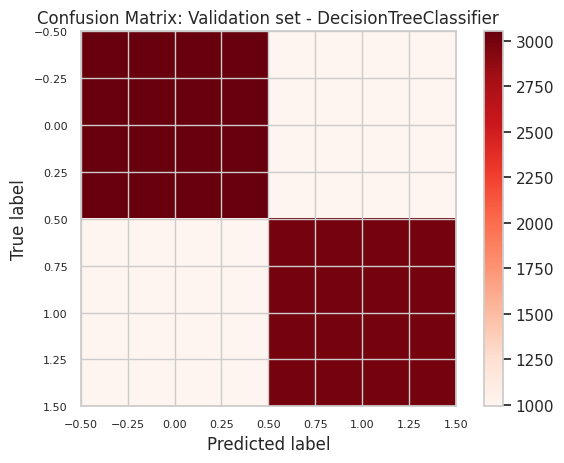

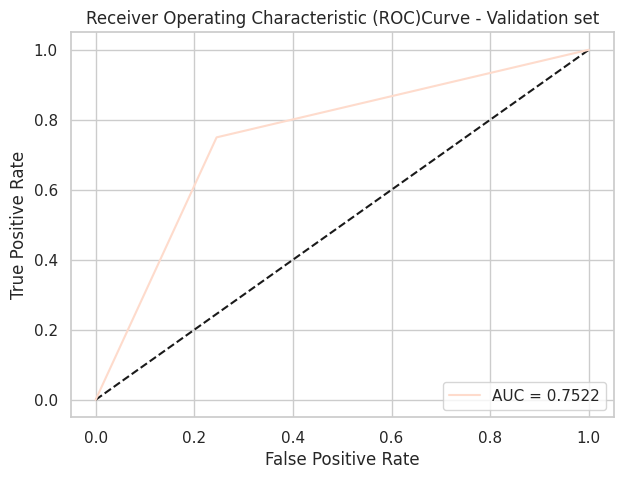

Test Set Evaluation:
Model Performance on Test set - DecisionTreeClassifier:


Classification Metrics:
Accuracy: 0.7508
Precision: 0.7522
Recall: 0.7471
F1-Score: 0.7497
AUC-ROC: 0.7508


Classification Report: Test set - DecisionTreeClassifier  

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      4023
           1       0.75      0.75      0.75      4014

    accuracy                           0.75      8037
   macro avg       0.75      0.75      0.75      8037
weighted avg       0.75      0.75      0.75      8037



Confusion Matrix: Test set - DecisionTreeClassifier 
      0     1
0  3035   988
1  1015  2999




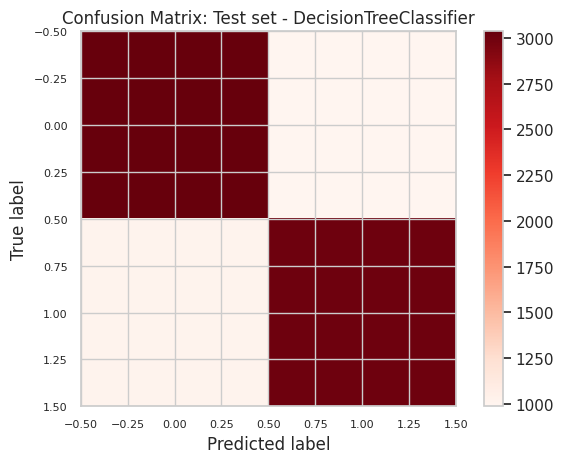

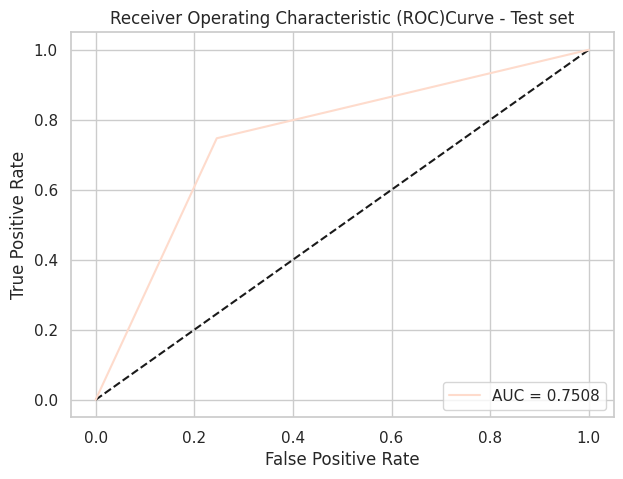

In [62]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
train_and_evaluate_model(dt_model, X_train_scaled_1, y_train_1, X_valid_scaled_1, y_valid_1, X_test_scaled_1, y_test_1)




==================== RandomForestClassifier ====================

Validation Set Evaluation:
Model Performance on Validation set - RandomForestClassifier:


Classification Metrics:
Accuracy: 0.8053
Precision: 0.8034
Recall: 0.8048
F1-Score: 0.8041
AUC-ROC: 0.8797


Classification Report: Validation set - RandomForestClassifier  

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      4045
           1       0.80      0.80      0.80      3991

    accuracy                           0.81      8036
   macro avg       0.81      0.81      0.81      8036
weighted avg       0.81      0.81      0.81      8036



Confusion Matrix: Validation set - RandomForestClassifier 
      0     1
0  3259   786
1   779  3212




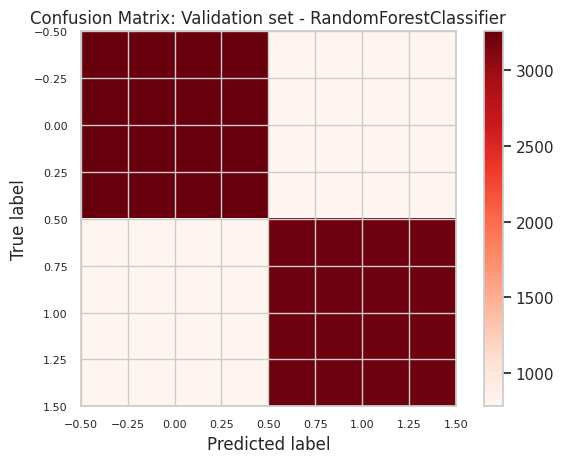

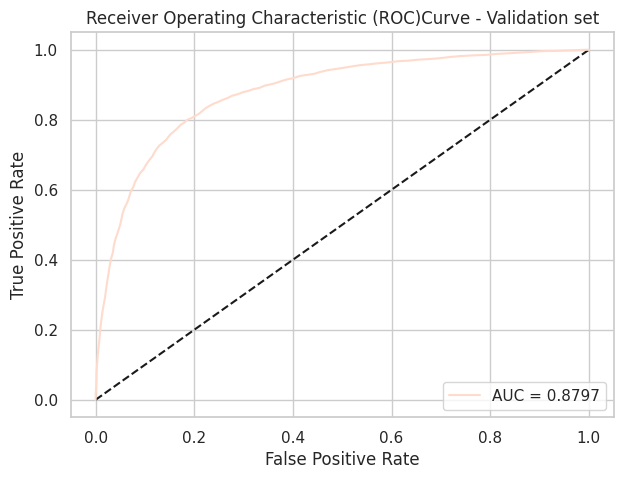

Test Set Evaluation:
Model Performance on Test set - RandomForestClassifier:


Classification Metrics:
Accuracy: 0.8034
Precision: 0.8083
Recall: 0.7950
F1-Score: 0.8016
AUC-ROC: 0.8779


Classification Report: Test set - RandomForestClassifier  

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4023
           1       0.81      0.79      0.80      4014

    accuracy                           0.80      8037
   macro avg       0.80      0.80      0.80      8037
weighted avg       0.80      0.80      0.80      8037



Confusion Matrix: Test set - RandomForestClassifier 
      0     1
0  3266   757
1   823  3191




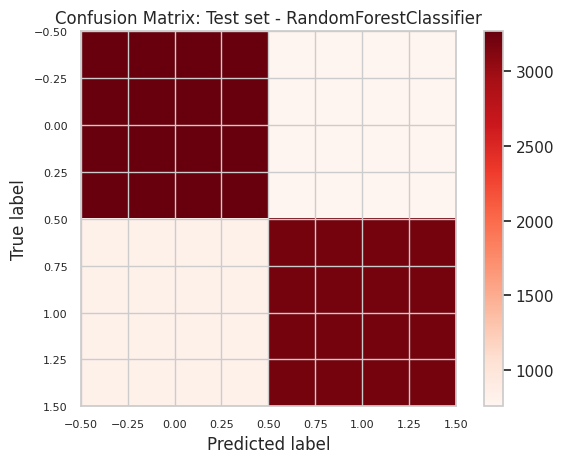

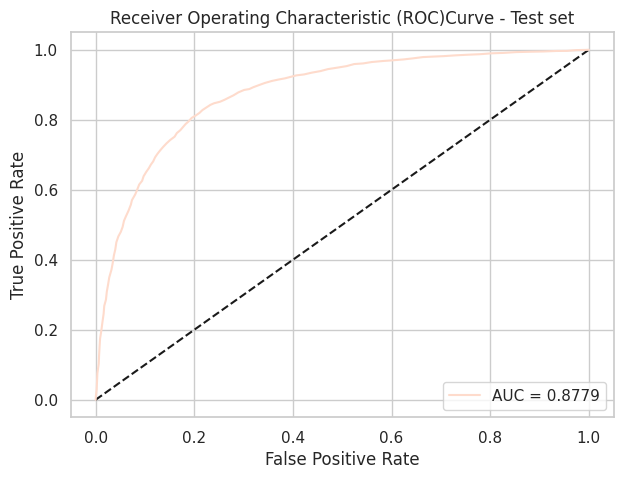

In [63]:

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
train_and_evaluate_model(rf_model, X_train_scaled_1, y_train_1, X_valid_scaled_1, y_valid_1, X_test_scaled_1, y_test_1)



==================== XGBClassifier ====================

Validation Set Evaluation:
Model Performance on Validation set - XGBClassifier:


Classification Metrics:
Accuracy: 0.7331
Precision: 0.7558
Recall: 0.6833
F1-Score: 0.7177
AUC-ROC: 0.8146


Classification Report: Validation set - XGBClassifier  

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      4045
           1       0.76      0.68      0.72      3991

    accuracy                           0.73      8036
   macro avg       0.74      0.73      0.73      8036
weighted avg       0.74      0.73      0.73      8036



Confusion Matrix: Validation set - XGBClassifier 
      0     1
0  3164   881
1  1264  2727




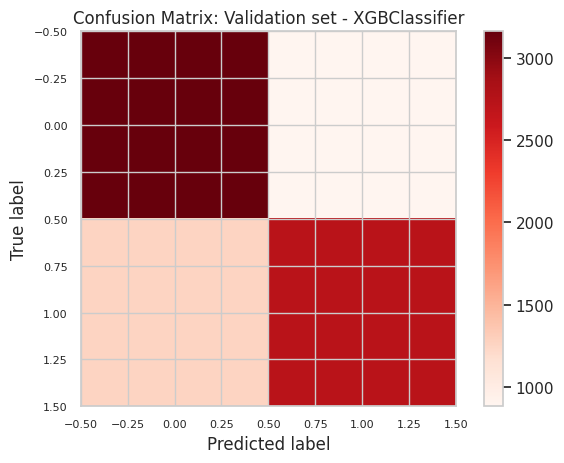

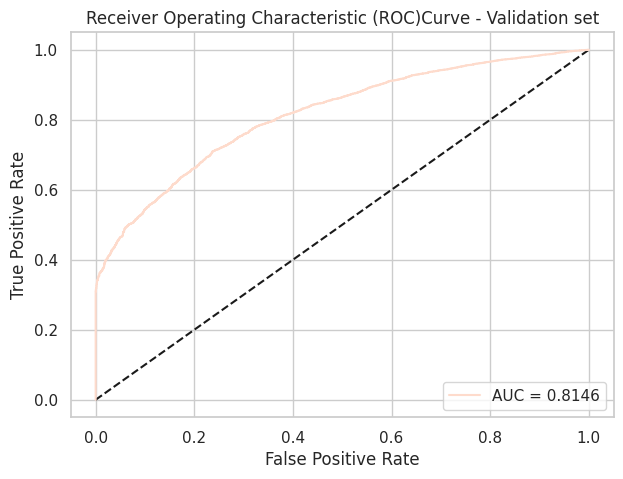

Test Set Evaluation:
Model Performance on Test set - XGBClassifier:


Classification Metrics:
Accuracy: 0.7365
Precision: 0.7616
Recall: 0.6876
F1-Score: 0.7227
AUC-ROC: 0.8143


Classification Report: Test set - XGBClassifier  

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      4023
           1       0.76      0.69      0.72      4014

    accuracy                           0.74      8037
   macro avg       0.74      0.74      0.74      8037
weighted avg       0.74      0.74      0.74      8037



Confusion Matrix: Test set - XGBClassifier 
      0     1
0  3159   864
1  1254  2760




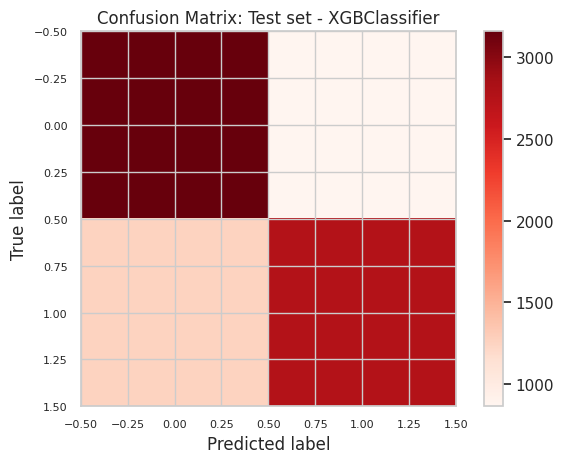

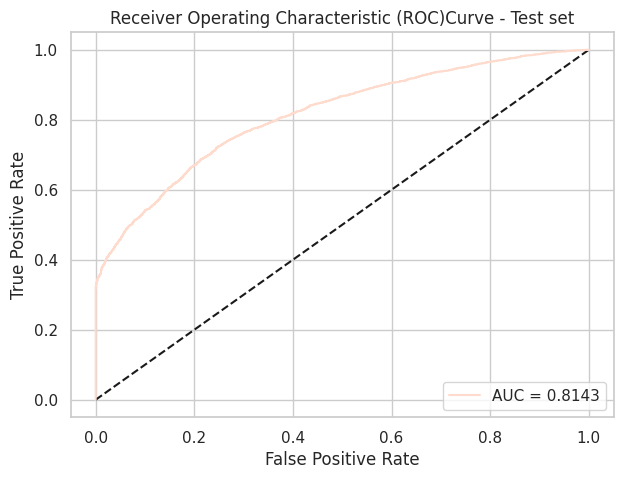

In [64]:
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, objective='multi:softmax', num_class=9)
train_and_evaluate_model(xgb_model, X_train_scaled_1, y_train_1, X_valid_scaled_1, y_valid_1, X_test_scaled_1, y_test_1)

In [65]:
def optimize_and_evaluate_model(model, param_grid, X_train, y_train, X_valid, y_valid, X_test, y_test, set_name):
    # Initialize GridSearchCV with the given model, hyperparameters, scoring metric, and cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

    # Fit GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and best score found by GridSearchCV
    print(f'Best Parameters found for {set_name} set - {type(model).__name__}:')
    print(f'{"="*20}{"="*20}')
    print(f"Best Parameters for {set_name} set: {grid_search.best_params_}")
    print(f"Best Score for {set_name} set: {grid_search.best_score_}")
    # Get the best model (i.e., the model with the best hyperparameters)
    best_model = grid_search.best_estimator_


Best Parameters found for Decision Tree set - DecisionTreeClassifier:
Best Parameters for Decision Tree set: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score for Decision Tree set: 0.7311287225501728

==================== DecisionTreeClassifier ====================

Validation Set Evaluation:
Model Performance on Validation set - DecisionTreeClassifier:


Classification Metrics:
Accuracy: 0.7522
Precision: 0.7510
Recall: 0.7497
F1-Score: 0.7503
AUC-ROC: 0.7522


Classification Report: Validation set - DecisionTreeClassifier  

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      4045
           1       0.75      0.75      0.75      3991

    accuracy                           0.75      8036
   macro avg       0.75      0.75      0.75      8036
weighted avg       0.75      0.75      0.75      8036



Confusion Matrix: Validation set - DecisionTreeClassifier 
      0     1
0  3053   992
1  

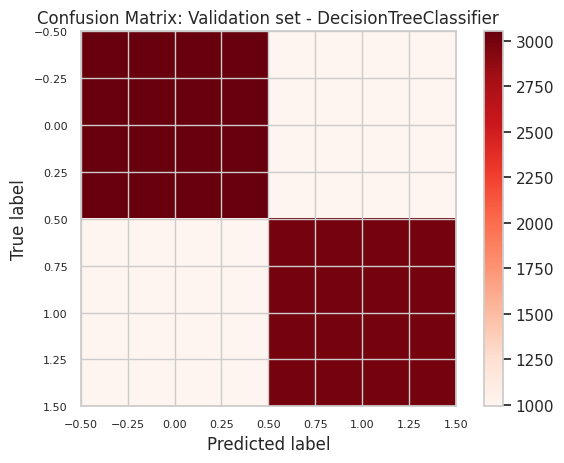

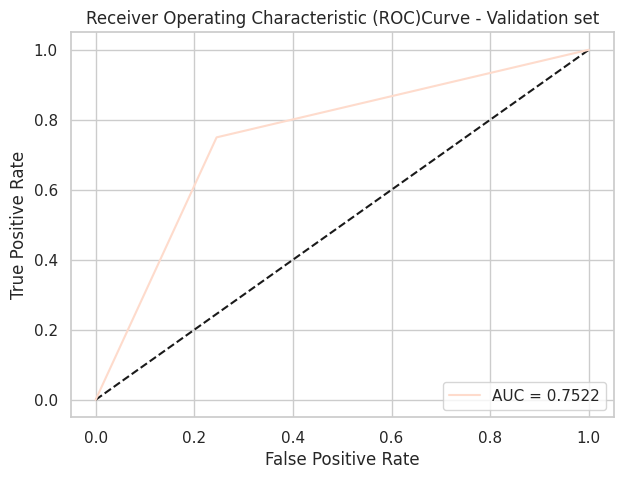

Test Set Evaluation:
Model Performance on Test set - DecisionTreeClassifier:


Classification Metrics:
Accuracy: 0.7508
Precision: 0.7522
Recall: 0.7471
F1-Score: 0.7497
AUC-ROC: 0.7508


Classification Report: Test set - DecisionTreeClassifier  

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      4023
           1       0.75      0.75      0.75      4014

    accuracy                           0.75      8037
   macro avg       0.75      0.75      0.75      8037
weighted avg       0.75      0.75      0.75      8037



Confusion Matrix: Test set - DecisionTreeClassifier 
      0     1
0  3035   988
1  1015  2999




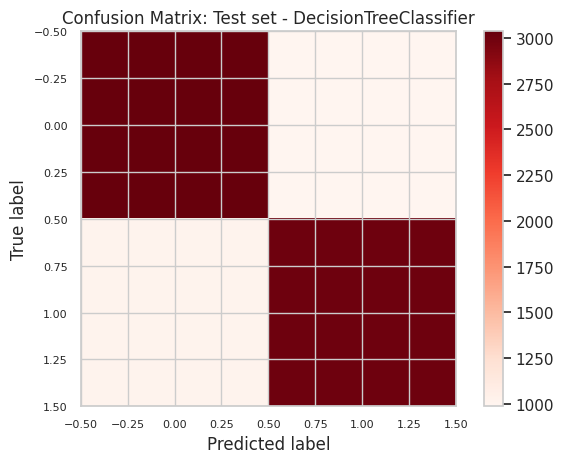

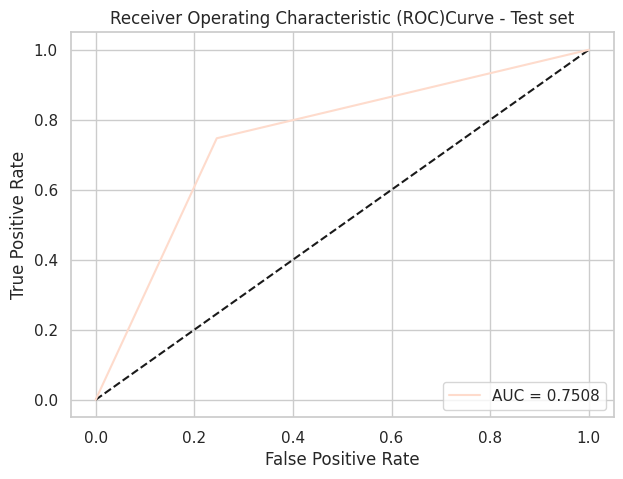

In [66]:
# Perform grid search for Decision Tree model

# Define the grid of hyperparameters for the Decision Tree model
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Decision Tree model with a random state for reproducibility
dt_model_A = DecisionTreeClassifier(random_state=42)

# Optimize and evaluate the Decision Tree model using the defined grid of hyperparameters
optimize_and_evaluate_model(dt_model_A, param_grid_dt, X_train_scaled_1, y_train_1, X_valid_scaled_1, y_valid_1, X_test_scaled_1, y_test_1, set_name="Decision Tree")
train_and_evaluate_model(dt_model_A, X_train_scaled_1, y_train_1, X_valid_scaled_1, y_valid_1, X_test_scaled_1, y_test_1)


Best Parameters found for Random Forest set - RandomForestClassifier:
Best Parameters for Random Forest set: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score for Random Forest set: 0.7890373267439946

==================== RandomForestClassifier ====================

Validation Set Evaluation:
Model Performance on Validation set - RandomForestClassifier:


Classification Metrics:
Accuracy: 0.8053
Precision: 0.8034
Recall: 0.8048
F1-Score: 0.8041
AUC-ROC: 0.8797


Classification Report: Validation set - RandomForestClassifier  

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      4045
           1       0.80      0.80      0.80      3991

    accuracy                           0.81      8036
   macro avg       0.81      0.81      0.81      8036
weighted avg       0.81      0.81      0.81      8036



Confusion Matrix: Validation set - RandomForestClassifier 
      0     1
0  3259   786
1  

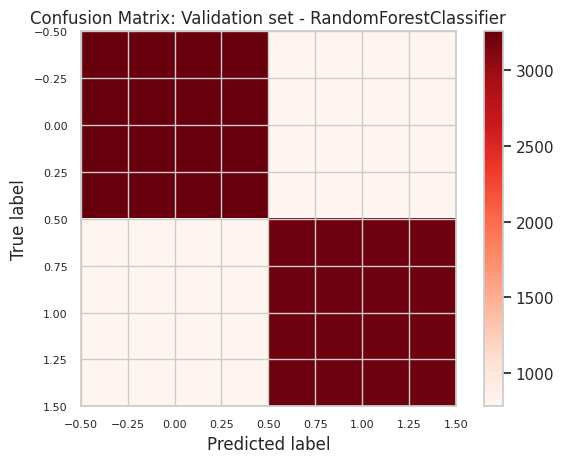

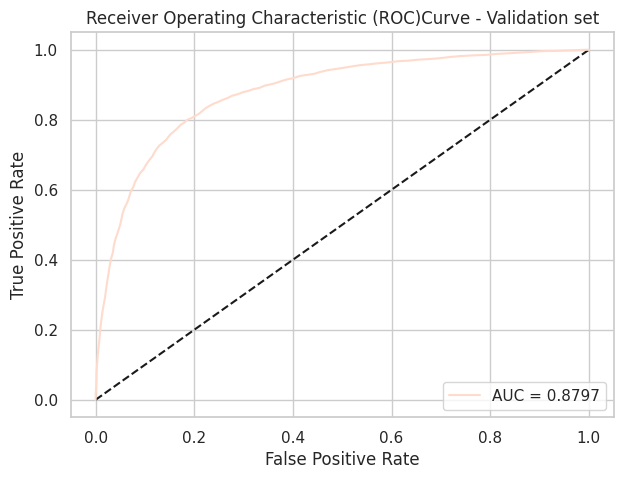

Test Set Evaluation:
Model Performance on Test set - RandomForestClassifier:


Classification Metrics:
Accuracy: 0.8034
Precision: 0.8083
Recall: 0.7950
F1-Score: 0.8016
AUC-ROC: 0.8779


Classification Report: Test set - RandomForestClassifier  

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4023
           1       0.81      0.79      0.80      4014

    accuracy                           0.80      8037
   macro avg       0.80      0.80      0.80      8037
weighted avg       0.80      0.80      0.80      8037



Confusion Matrix: Test set - RandomForestClassifier 
      0     1
0  3266   757
1   823  3191




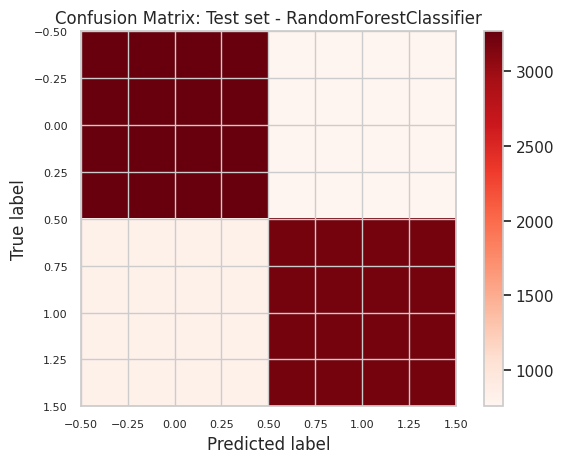

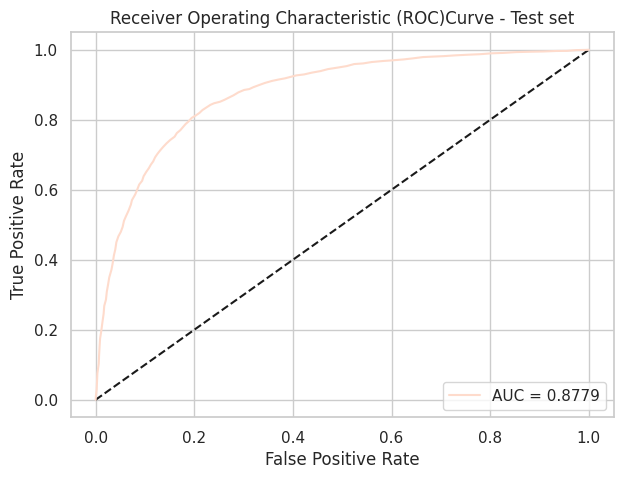

In [67]:
# Perform grid search for Random Forest model

# Define the grid of hyperparameters for the Random Forest model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest model with a random state for reproducibility
best_rf_model = RandomForestClassifier(random_state=42)

# Optimize and evaluate the Random Forest model using the defined grid of hyperparameters
optimize_and_evaluate_model(best_rf_model, param_grid_rf, X_train_scaled_1, y_train_1, X_valid_scaled_1, y_valid_1, X_test_scaled_1, y_test_1, set_name="Random Forest")
train_and_evaluate_model(best_rf_model, X_train_scaled_1, y_train_1, X_valid_scaled_1, y_valid_1, X_test_scaled_1, y_test_1)


Best Parameters found for XGBoost set - XGBClassifier:
Best Parameters for XGBoost set: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Score for XGBoost set: 0.7247515937091522

==================== XGBClassifier ====================

Validation Set Evaluation:
Model Performance on Validation set - XGBClassifier:


Classification Metrics:
Accuracy: 0.7331
Precision: 0.7558
Recall: 0.6833
F1-Score: 0.7177
AUC-ROC: 0.8146


Classification Report: Validation set - XGBClassifier  

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      4045
           1       0.76      0.68      0.72      3991

    accuracy                           0.73      8036
   macro avg       0.74      0.73      0.73      8036
weighted avg       0.74      0.73      0.73      8036



Confusion Matrix: Validation set - XGBClassifier 
      0     1
0  3164   881
1  1264  2727




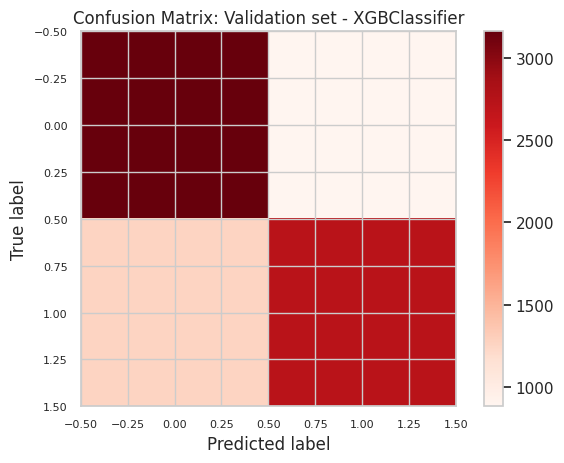

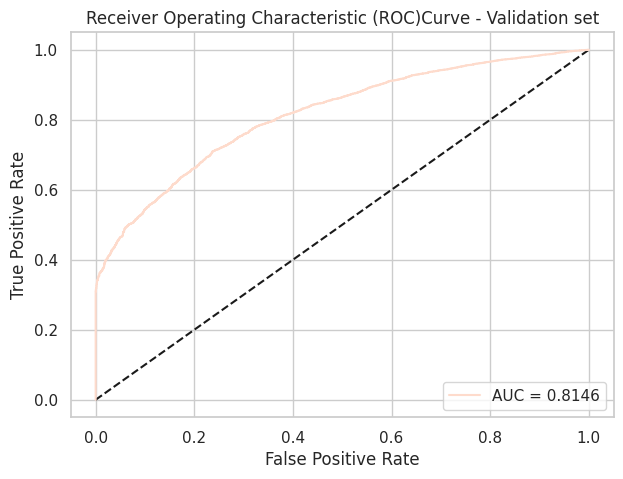

Test Set Evaluation:
Model Performance on Test set - XGBClassifier:


Classification Metrics:
Accuracy: 0.7365
Precision: 0.7616
Recall: 0.6876
F1-Score: 0.7227
AUC-ROC: 0.8143


Classification Report: Test set - XGBClassifier  

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      4023
           1       0.76      0.69      0.72      4014

    accuracy                           0.74      8037
   macro avg       0.74      0.74      0.74      8037
weighted avg       0.74      0.74      0.74      8037



Confusion Matrix: Test set - XGBClassifier 
      0     1
0  3159   864
1  1254  2760




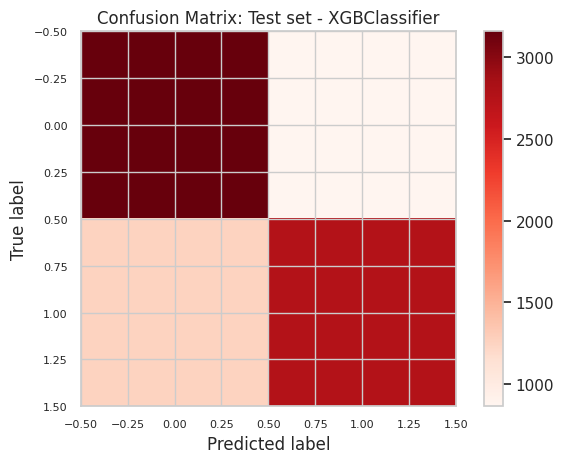

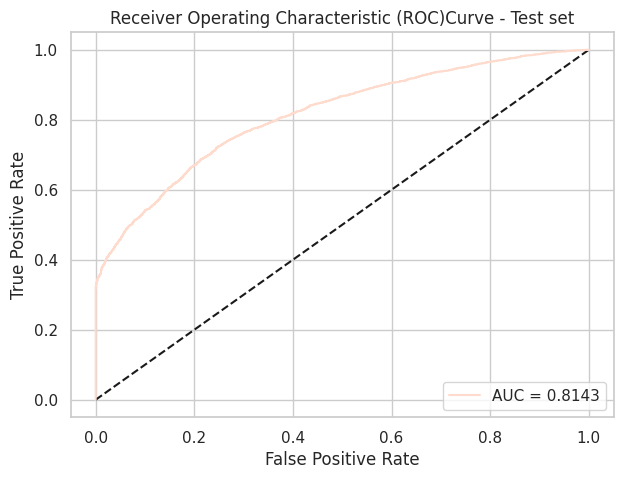

In [68]:


# Define parameter grid for XGBoost model
param_grid_xgb = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, objective='multi:softmax', num_class=9)

# Perform grid search and evaluate model
optimize_and_evaluate_model(xgb_model, param_grid_xgb, X_train_scaled_1, y_train_1, X_valid_scaled_1, y_valid_1, X_test_scaled_1, y_test_1, set_name="XGBoost")
train_and_evaluate_model(xgb_model, X_train_scaled_1, y_train_1, X_valid_scaled_1, y_valid_1, X_test_scaled_1, y_test_1)


In [69]:
# Initialize the JS visualization for SHAP plots
shap.initjs()

# Train an XGBoost Regressor model using the validation set
model = xgb.XGBClassifier().fit(X_valid_scaled_1, y_valid_1)

# Create a SHAP explainer for the XGBoost model
explainer = shap.Explainer(model)

# Generate SHAP values for the entire dataset
shap_values = explainer(X)


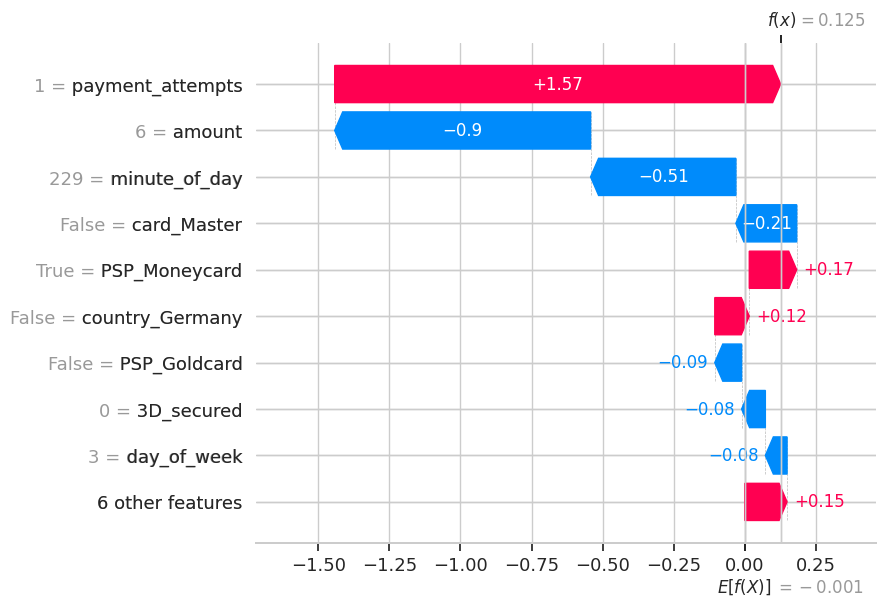

In [70]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [71]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [72]:
# visualize the Secondary prediction's explanation with a force plot
shap.plots.force(shap_values[1])

In [73]:
# visualize all the training set predictions
shap.plots.force(shap_values[:500])

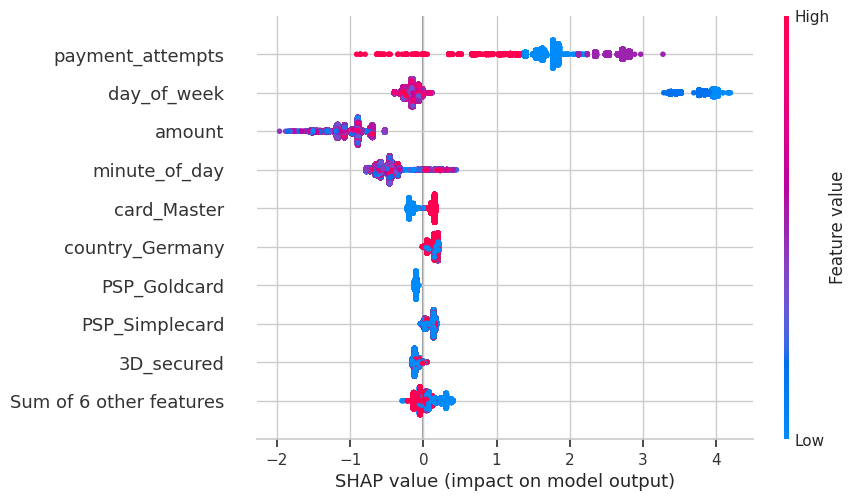

In [74]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

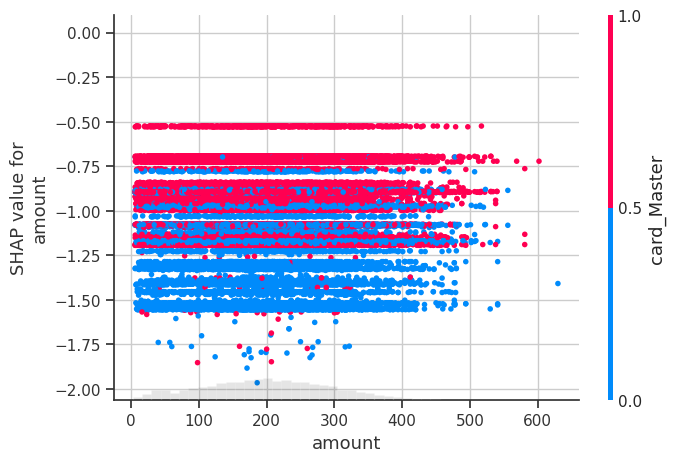

In [75]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "amount"], color=shap_values)

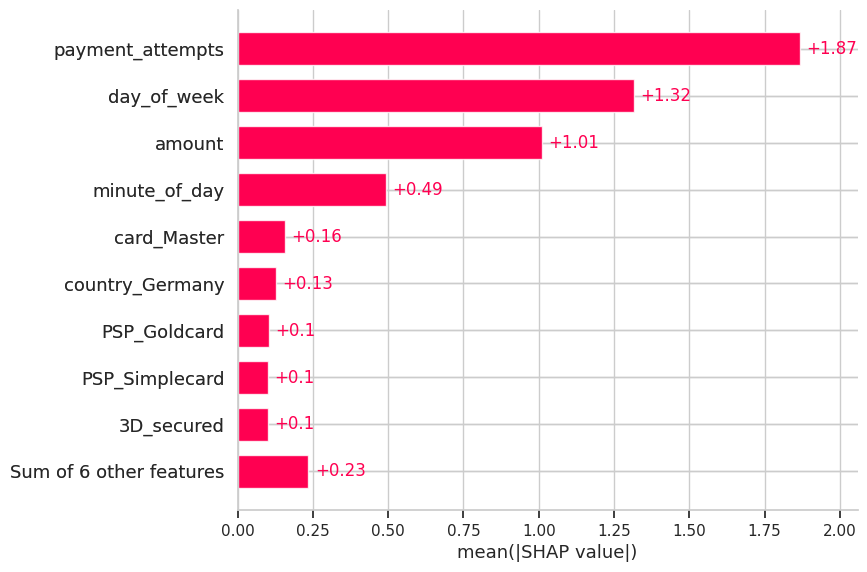

In [76]:
shap.plots.bar(shap_values)


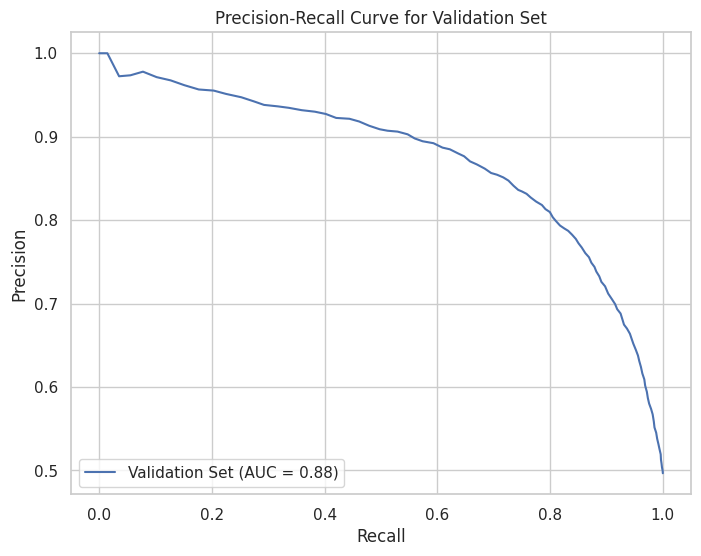

In [77]:
# Precision-Recall Curve for validation and test set of Model 1
# Predict probabilities on the validation set
y_valid_pred_proba = best_rf_model.predict_proba(X_valid_scaled_1)[:, 1]
# Predict probabilities on the test set
y_test_pred_proba = best_rf_model.predict_proba(X_test_scaled_1)[:, 1]
# Compute precision-recall curve values for validation set
precision_valid, recall_valid, thresholds_valid = precision_recall_curve(y_valid_1,
y_valid_pred_proba)
# Compute area under the curve (AUC) for validation set
pr_auc_valid = auc(recall_valid, precision_valid)
# Plot the precision-recall curve for validation set
plt.figure(figsize=(8, 6))
plt.plot(recall_valid, precision_valid, label=f'Validation Set (AUC = {pr_auc_valid:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Validation Set')
plt.legend(loc='lower left')
plt.show()

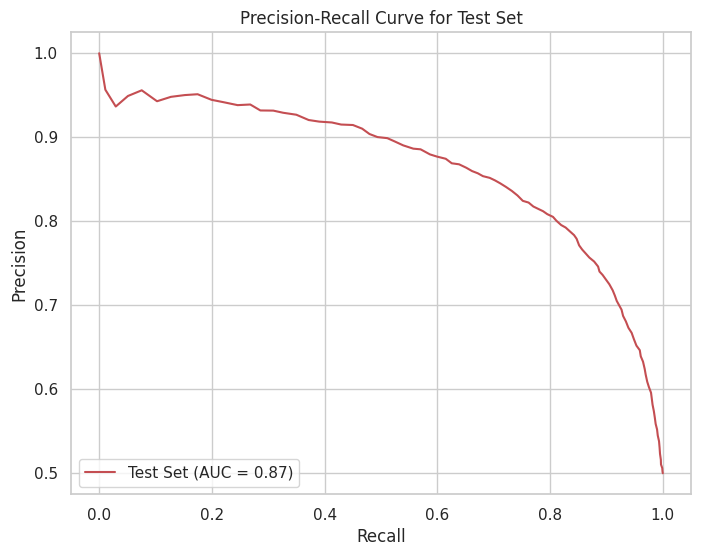

In [78]:
# Compute precision-recall curve values for test set
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test_1,
y_test_pred_proba)
# Compute area under the curve (AUC) for test set
pr_auc_test = auc(recall_test, precision_test)
# Plot the precision-recall curve for test set
plt.figure(figsize=(8, 6))
plt.plot(recall_test, precision_test, label=f'Test Set (AUC = {pr_auc_test:.2f})', color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Test Set')
plt.legend(loc='lower left')
plt.show()

In [79]:
def evaluate_model(model, X, y, set_name=""):
    """
    Evaluate the performance of a classification model on a given dataset.
    Parameters:
    - model: The trained classification model.
    - X: The feature matrix of the dataset.
    - y: The true labels of the dataset.
    - set_name: The name of the dataset (e.g., "Train", "Validation", "Test").
    Prints:
    - Accuracy, Precision, Recall, F1 Score, ROC AUC Score, Confusion Matrix.
    """
    # Make predictions
    y_pred = model.predict(X)
    # Convert y to 1D array if it's a DataFrame
    if hasattr(y, 'values'):
        y = y.values.ravel()

    # Calculate and print relevant evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    roc_auc = roc_auc_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)

    print(f'\n{"="*20} {type(model).__name__} {"="*20}\n')
    print(f'{set_name} Set Evaluation: {type(model).__name__}')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    cm_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)

    print(f'{set_name} Set Evaluation: {type(model).__name__}')
    print(f'\n{"="*20}{"="*20}\n')
    print(f'Classification Report: {set_name} set - {type(model).__name__}  \n')
    print (classification_report(y,y_pred))
    print(f'\n{"="*20}{"="*20}\n')
    print(f'Confusion Matrix: {set_name} set - {type(model).__name__}  \n')
    print("Confusion Matrix:")

    print(cm_df)
    print(f'\n{"="*20}{"="*20}\n')
    plt.figure()
    plt.imshow(cm_df, cmap='Reds')
    plt.title(f'Confusion Matrix {set_name} Set Evaluation: {type(model).__name__}')
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()
    plt.show()

def plot_roc_curve(fpr, tpr, auc_score, set_name="", model_name=""):
    """
    Plot ROC Curve for a given set.
    Parameters:
    - fpr: False Positive Rate.
    - tpr: True Positive Rate.
    - auc_score: Area Under the ROC Curve.
    - set_name: The name of the dataset (e.g., "Validation", "Test").
    - model_name: The name of the classification model.
    """
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{set_name} ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {set_name} Set: {model_name}')
    plt.legend()
    plt.show()

# Fit the Random Forest model
best_rf_model.fit(X_train_scaled_1, y_train_1)

# Predict probabilities on the validation set
y_valid_pred_proba = best_rf_model.predict_proba(X_valid_scaled_1)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_valid_1, y_valid_pred_proba)

# Find the threshold for a desired trade-off (e.g., balance between precision and recall)
desired_precision = 0.85
desired_recall = 0.85

# Find the index of the point on the curve closest to the desired trade-off
closest_point_index = np.argmin(np.abs(precision - desired_precision) + np.abs(recall - desired_recall))

# Get the corresponding threshold
desired_threshold = thresholds[closest_point_index]

adjusted_predictions_valid = (y_valid_pred_proba >= desired_threshold).astype(int)
# Adjust the decision threshold for both validation and test sets
adjusted_threshold = 0.445
adjusted_predictions_valid = (y_valid_pred_proba >= adjusted_threshold).astype(int)
adjusted_predictions_test = (best_rf_model.predict_proba(X_test_scaled_1)[:, 1] >= adjusted_threshold).astype(int)

# Compute ROC Curve for both validation and test sets
fpr_valid, tpr_valid, _ = roc_curve(y_valid_1, y_valid_pred_proba)
roc_auc_valid = auc(fpr_valid, tpr_valid)

fpr_test, tpr_test, _ = roc_curve(y_test_1, best_rf_model.predict_proba(X_test_scaled_1)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

Desired Threshold: 0.4500

==================== RandomForestClassifier ====================

Validation Set Evaluation: RandomForestClassifier
Accuracy: 0.8053
Precision: 0.8053
Recall: 0.8053
F1 Score: 0.8053
ROC AUC: 0.8052
Validation Set Evaluation: RandomForestClassifier


Classification Report: Validation set - RandomForestClassifier  

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      4045
           1       0.80      0.80      0.80      3991

    accuracy                           0.81      8036
   macro avg       0.81      0.81      0.81      8036
weighted avg       0.81      0.81      0.81      8036



Confusion Matrix: Validation set - RandomForestClassifier  

Confusion Matrix:
      0     1
0  3259   786
1   779  3212




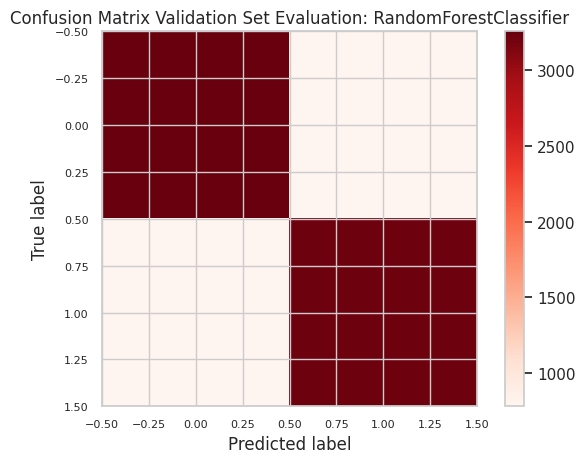

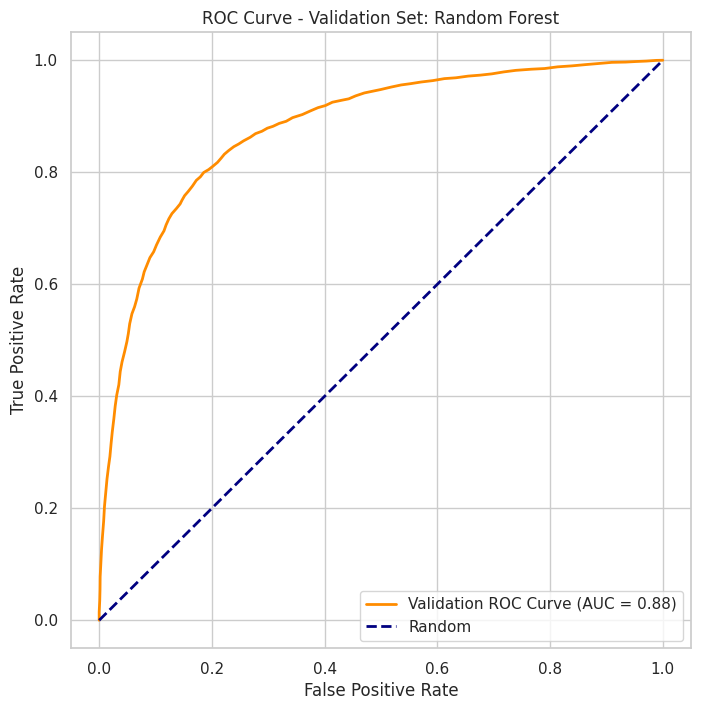


==================== RandomForestClassifier ====================

Test Set Evaluation: RandomForestClassifier
Accuracy: 0.8034
Precision: 0.8035
Recall: 0.8034
F1 Score: 0.8034
ROC AUC: 0.8034
Test Set Evaluation: RandomForestClassifier


Classification Report: Test set - RandomForestClassifier  

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      4023
           1       0.81      0.79      0.80      4014

    accuracy                           0.80      8037
   macro avg       0.80      0.80      0.80      8037
weighted avg       0.80      0.80      0.80      8037



Confusion Matrix: Test set - RandomForestClassifier  

Confusion Matrix:
      0     1
0  3266   757
1   823  3191




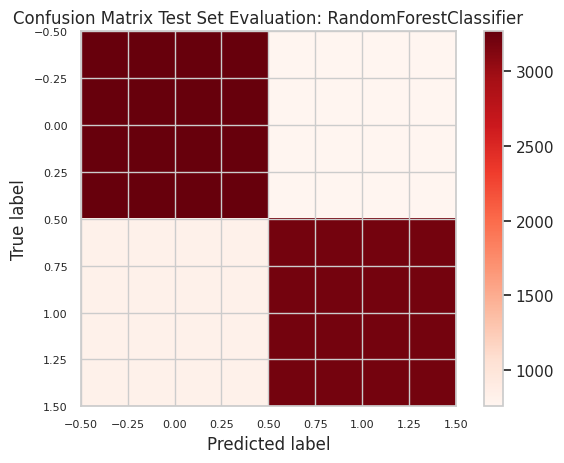

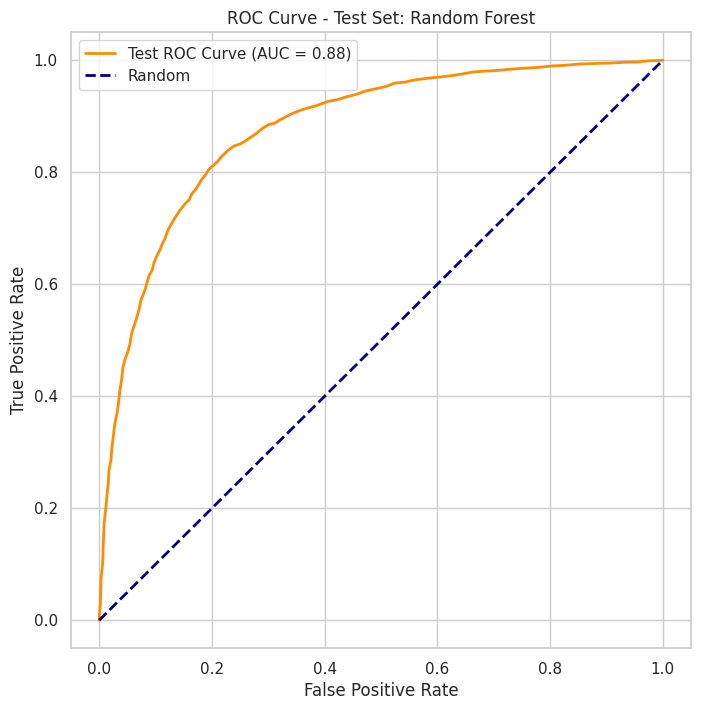

In [80]:
# Print the desired threshold
print(f"Desired Threshold: {desired_threshold:.4f}")
# Adjust the decision threshold for the validation set
# Evaluate the model on the validation set
evaluate_model(best_rf_model, X_valid_scaled_1, y_valid_1, set_name="Validation")
plot_roc_curve(fpr_valid, tpr_valid, roc_auc_valid, set_name="Validation", model_name="Random Forest")
# Evaluate the model on the test set
evaluate_model(best_rf_model, X_test_scaled_1, y_test_1, set_name="Test")
plot_roc_curve(fpr_test, tpr_test, roc_auc_test, set_name="Test", model_name="Random Forest")

In [81]:
def plot_confusion_matrix(confusion_matrix, title):
    # Calculate total correctly classified and misclassified instances
    correctly_classified = np.trace(confusion_matrix)
    misclassified = np.sum(confusion_matrix) - correctly_classified

    # Create a new figure and a set of subplots
    fig, ax = plt.subplots()

    # Create a pie chart
    ax.pie([correctly_classified, misclassified], labels=['Correctly Classified', 'Misclassified'], colors=['#ff9999', '#66b3ff'], autopct='%1.1f%%', shadow=True, startangle=140)

    # Display the pie chart
    plt.title(title)
    plt.show()

    # Print the results
    print("Total Correctly Classified Instances:", correctly_classified)
    print("Total Misclassified Instances:", misclassified)



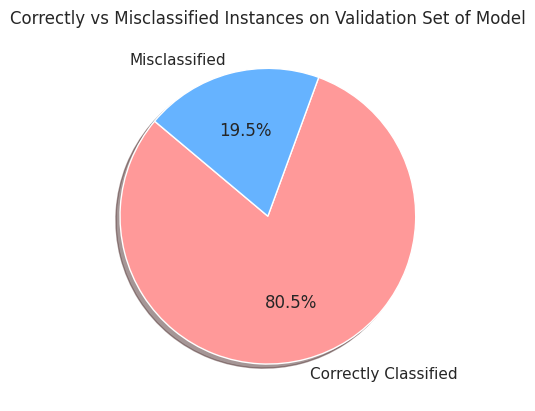

Total Correctly Classified Instances: 6471
Total Misclassified Instances: 1565


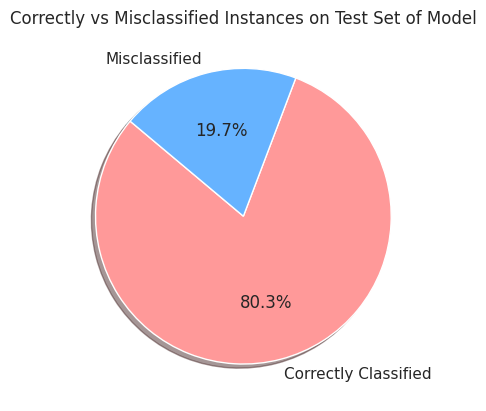

Total Correctly Classified Instances: 6457
Total Misclassified Instances: 1580


In [82]:
# Confusion matrix of Model A on Validation Set
confusion_matrix_a_validation = np.array([[3259,   786],
                                          [779,  3212]])

plot_confusion_matrix(confusion_matrix_a_validation, 'Correctly vs Misclassified Instances on Validation Set of Model')

# Confusion matrix of Model A on Validation Set
confusion_matrix_a_test = np.array([[3266,  757],
                                    [ 823, 3191]])

plot_confusion_matrix(confusion_matrix_a_test, 'Correctly vs Misclassified Instances on Test Set of Model')


In [83]:

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_child_weight': [2, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_1)

# Scale the training and testing data
X_train_scaled_1 = scaler.transform(X_train_1)
X_test_scaled_1 = scaler.transform(X_test_1)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model on the training data
grid_search.fit(X_train_scaled_1, y_train_1)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=50; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=50; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=50; total time=   1.3s[CV] END learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=50; total time=   1.3s

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=50; total time=   1.4s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=100; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=100; total time=   2.4s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=100; total time=   2.3s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=100; total time=   2.3s
[CV] END learning_rate=0.1, max_depth=10, min_child_

/home/samyak/PycharmProjects/Case_study_model_eng/venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END learning_rate=0.01, max_depth=20, min_child_weight=2, n_estimators=100; total time=   9.5s
[CV] END learning_rate=0.01, max_depth=20, min_child_weight=2, n_estimators=200; total time=  17.1s
[CV] END learning_rate=0.01, max_depth=20, min_child_weight=2, n_estimators=200; total time=  18.7s
[CV] END learning_rate=0.01, max_depth=20, min_child_weight=2, n_estimators=200; total time=  18.3s
[CV] END learning_rate=0.01, max_depth=20, min_child_weight=5, n_estimators=50; total time=   3.8s
[CV] END learning_rate=0.01, max_depth=20, min_child_weight=2, n_estimators=200; total time=  19.0s
[CV] END learning_rate=0.01, max_depth=20, min_child_weight=5, n_estimators=50; total time=   3.3s
[CV] END learning_rate=0.01, max_depth=20, min_child_weight=5, n_estimators=50; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=20, min_child_weight=5, n_estimators=50; total time=   3.9s
[CV] END learning_rate=0.01, max_depth=20, min_child_weight=5, n_estimators=50; total time=   3.4s
[CV] 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [10, 20, 30],
                         'min_child_weight': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [84]:
# Access cross-validation results
cv_results_xgb = grid_search.cv_results_
# Print performance metrics for each fold
for i in range(grid_search.n_splits_):
  print(f"\nResults for Fold {i + 1}:")
  print(f"Mean Test Score: {cv_results_xgb[f'mean_test_score'][i]}")
  print(f"Standard Deviation Test Score: {cv_results_xgb[f'std_test_score'][i]}")
  print(f"Params: {cv_results_xgb['params'][i]}")


Results for Fold 1:
Mean Test Score: 0.735437290329559
Standard Deviation Test Score: 0.003425995624542122
Params: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 50}

Results for Fold 2:
Mean Test Score: 0.7458120405231317
Standard Deviation Test Score: 0.0044130245866453545
Params: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 100}

Results for Fold 3:
Mean Test Score: 0.7524381444793538
Standard Deviation Test Score: 0.0024227086410330547
Params: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 200}

Results for Fold 4:
Mean Test Score: 0.7339907128431806
Standard Deviation Test Score: 0.004564923155756975
Params: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 50}

Results for Fold 5:
Mean Test Score: 0.7420478421864358
Standard Deviation Test Score: 0.004134851181198634
Params: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 1

In [85]:

#Evaluate Cross-Validation Stability of Model A
# Define the parameter grid for hyperparameter tuning
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [10, 20, 30],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
# Create GridSearchCV
grid_search = GridSearchCV(estimator=best_rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
# Fit the model on the training data
grid_search.fit(X_train_scaled_1, y_train_1)
# Access cross-validation results
cv_results = grid_search.cv_results_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.6s
[CV] END max_depth=10, min_samples

In [86]:
# Print performance metrics for each fold
for i in range(grid_search.n_splits_):
  print(f"\nResults for Fold {i + 1}:")
  print(f"Mean Test Score: {cv_results[f'mean_test_score'][i]}")
  print(f"Standard Deviation Test Score: {cv_results[f'std_test_score'][i]}")
  print(f"Params: {cv_results['params'][i]}")


Results for Fold 1:
Mean Test Score: 0.6801263536401752
Standard Deviation Test Score: 0.00416582930003321
Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Results for Fold 2:
Mean Test Score: 0.6816350826717402
Standard Deviation Test Score: 0.0025292434157193947
Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Results for Fold 3:
Mean Test Score: 0.6827394486529785
Standard Deviation Test Score: 0.0024241055046142087
Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Results for Fold 4:
Mean Test Score: 0.6814328279644963
Standard Deviation Test Score: 0.0033573024504930343
Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

Results for Fold 5:
Mean Test Score: 0.682070584999771
Standard Deviation Test Score: 0.0024579291548511356
Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_est

In [87]:
# Overfitting Analysis for Model
# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
  plt.figure()
  plt.title(title)

  if ylim is not None:
    plt.ylim(*ylim)

  plt.xlabel("Training examples")
  plt.ylabel("F1 Score")

  train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_macro')
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,  color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
  plt.legend(loc="best")

  # Print calculations
  print(f"Train Sizes: {train_sizes}")
  print(f"Training Scores Mean: {train_scores_mean}")
  print(f"Training Scores Std: {train_scores_std}")
  print(f"Test Scores Mean: {test_scores_mean}")
  print(f"Test Scores Std: {test_scores_std}")
  return plt



Train Sizes: [ 5143 16715 28287 39859 51432]
Training Scores Mean: [1.         1.         1.         0.99997491 0.99998833]
Training Scores Std: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.58675248e-05
 1.55545334e-05]
Test Scores Mean: [0.65998813 0.71996642 0.74994386 0.77385121 0.78864167]
Test Scores Std: [0.00539138 0.00432159 0.00450727 0.0023873  0.00248964]


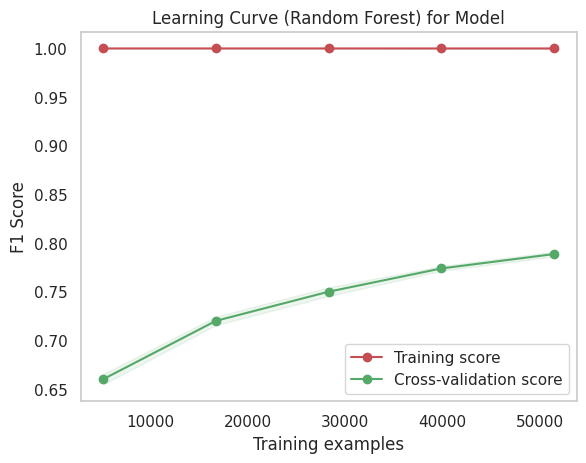

In [88]:
 # Plot learning curve
title = "Learning Curve (Random Forest) for Model"
cv = 5 # Cross-validation folds
plot_learning_curve(best_rf_model, title, X_train_scaled_1, y_train_1, cv=cv)
plt.show()


In [89]:
# Drop 'success' and 'transaction_fee' columns from the original DataFrame
X_original = df.drop(['success', 'transaction_fee'], axis=1)
# One-hot encode categorical columns: 'country', 'PSP', 'card'
X_original_encoded = pd.get_dummies(X_original, columns=['country', 'PSP', 'card'])
# Identify additional columns in X_original_encoded not present in X_train_1
additional_columns = set(X_original_encoded.columns) - set(X_train_1.columns)
if additional_columns:
  print(f"Additional columns in X_original_encoded: {additional_columns}")
# Identify missing columns in X_original_encoded compared to X_train_1
missing_columns = set(X_train_1.columns) - set(X_original_encoded.columns)
if missing_columns:
  print(f"Missing columns in X_original_encoded: {missing_columns}")
# Keep only columns present in X_train_1 in X_original_encoded
X_original_encoded = X_original_encoded[X_train_1.columns]
# Scale the features using the previously defined 'scaler'
X_original_scaled = scaler.transform(X_original_encoded)
# Predict success probabilities using the trained random forest Model A
success_probabilities = xgb_model.predict_proba(X_original_scaled)[:, 1]
# Add the success probabilities as a new column to the original DataFrame
df['success_probabilities'] = success_probabilities
# Display the updated DataFrame
print(df)

           country  amount  success         PSP  3D_secured    card  \
0          Austria       6        0   Moneycard           0  Diners   
1          Austria       6        0  Simplecard           0  Diners   
2          Austria       6        0     UK_Card           0  Diners   
3          Austria       6        0     UK_Card           0  Diners   
4          Austria       6        0  Simplecard           0  Diners   
...            ...     ...      ...         ...         ...     ...   
50405  Switzerland     499        0     UK_Card           0  Master   
50406  Switzerland     499        0     UK_Card           0  Master   
50407  Switzerland     499        0     UK_Card           0  Master   
50408  Switzerland     499        0     UK_Card           0  Master   
50409  Switzerland     499        0     UK_Card           0  Master   

       transaction_fee  day_of_week  minute_of_day  payment_attempts  \
0                  2.0            3            229                 1   
1  

In [90]:
# Create a copy of the DataFrame
df_2 = df.copy()
# Drop the 'transaction_fee' column from the copied DataFrame
# Encode categorical variables using one-hot encoding
df_encoded_2 = pd.get_dummies(df_2, columns=['country', 'card'])
# Print the DataFrame after one-hot encoding
print(df_encoded_2)

       amount  success         PSP  3D_secured  transaction_fee  day_of_week  \
0           6        0   Moneycard           0              2.0            3   
1           6        0  Simplecard           0              0.5            3   
2           6        0     UK_Card           0              1.0            4   
3           6        0     UK_Card           0              1.0            4   
4           6        0  Simplecard           0              0.5            4   
...       ...      ...         ...         ...              ...          ...   
50405     499        0     UK_Card           0              1.0            3   
50406     499        0     UK_Card           0              1.0            3   
50407     499        0     UK_Card           0              1.0            3   
50408     499        0     UK_Card           0              1.0            3   
50409     499        0     UK_Card           0              1.0            3   

       minute_of_day  payment_attempts 

In [91]:
# Split the dataset into features (X) and target variable (y)
X = df_encoded_2.drop(['PSP', 'success'], axis=1)
y = df_encoded_2['PSP']
# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Create and train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
# Drop the target variables 'PSP' and 'success' from the features
X_2 = df_encoded_2.drop(['PSP', 'success'], axis=1)
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the features using StandardScaler
X_scaled_2 = scaler.fit_transform(X_2)
# Create a DataFrame with scaled features and include the 'PSP' column
df_scaled_2 = pd.DataFrame(X_scaled_2, columns=X_2.columns)
df_scaled_2[['PSP']] = df_encoded_2[['PSP']]
# Print the DataFrame with scaled features
print(df_scaled_2)

         amount  3D_secured  transaction_fee  day_of_week  minute_of_day  \
0     -2.039971    -0.55928         0.134244     0.125262      -1.180246   
1     -2.039971    -0.55928        -0.692643     0.125262      -1.180246   
2     -2.039971    -0.55928        -0.417014     0.646728      -1.004572   
3     -2.039971    -0.55928        -0.417014     0.646728      -1.004572   
4     -2.039971    -0.55928        -0.692643     0.646728      -1.004572   
...         ...         ...              ...          ...            ...   
50405  3.080842    -0.55928        -0.417014     0.125262      -1.136929   
50406  3.080842    -0.55928        -0.417014     0.125262      -1.136929   
50407  3.080842    -0.55928        -0.417014     0.125262      -1.134522   
50408  3.080842    -0.55928        -0.417014     0.125262      -1.134522   
50409  3.080842    -0.55928        -0.417014     0.125262      -1.132116   

       payment_attempts  success_probabilities  country_Austria  \
0             -0.531

In [93]:
# Split the scaled DataFrame into features (X_smote_2) and target variable (y_smote_2)
X_smote_2 = df_scaled_2.drop('PSP', axis=1)
y_smote_2 = df_scaled_2['PSP']
# Initialize the SMOTE with a random state
smote_2 = SMOTE(random_state=42)
# Resample the dataset using SMOTE
X_resampled_2, y_resampled_2 = smote_2.fit_resample(X_smote_2, y_smote_2)
# Create a DataFrame with resampled features and include the 'PSP' column
df_2_resampled = pd.DataFrame(X_resampled_2, columns=X_smote_2.columns)
df_2_resampled['PSP'] = y_resampled_2
# Print the resampled DataFrame
print(df_2_resampled)

          amount  3D_secured  transaction_fee  day_of_week  minute_of_day  \
0      -2.039971   -0.559280         0.134244     0.125262      -1.180246   
1      -2.039971   -0.559280        -0.692643     0.125262      -1.180246   
2      -2.039971   -0.559280        -0.417014     0.646728      -1.004572   
3      -2.039971   -0.559280        -0.417014     0.646728      -1.004572   
4      -2.039971   -0.559280        -0.692643     0.646728      -1.004572   
...          ...         ...              ...          ...            ...   
105831 -1.828316   -0.559280        -0.692643    -1.439138      -1.383791   
105832 -1.159684    1.788012        -0.692643     1.168195      -1.536938   
105833 -0.085479   -0.559280        -0.661659    -0.396205       0.147578   
105834 -0.412413   -0.559280        -0.692643    -0.917672       1.224076   
105835  1.366484   -0.559280        -0.692643    -0.917672       0.359207   

        payment_attempts  success_probabilities  country_Austria  \
0      

In [94]:
# Split the resampled DataFrame into features (X_2) and target variable (y_2)
X_2 = df_2_resampled.drop('PSP', axis=1)
y_2 = df_2_resampled['PSP']
# Split the dataset into train, validation, and test sets
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_valid_2, X_test_2, y_valid_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5,random_state=42)
# Normalize Data
scaler = StandardScaler()
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_valid_scaled_2 = scaler.transform(X_valid_2)
X_test_scaled_2 = scaler.transform(X_test_2)

In [95]:

def evaluate_model2(model, X, y, set_name):
    # Make predictions on the data
    y_pred = model.predict(X)
    # Extract the values of the target variable
    y_values = y.values.ravel() # Convert DataFrame to 1D array
    # Calculate and print relevant evaluation metrics
    precision = precision_score(y_values, y_pred, average='weighted')
    recall = recall_score(y_values, y_pred, average='weighted')
    f1 = f1_score(y_values, y_pred, average='weighted')
    # For binary classification, set multi_class to 'ovr'
    if len(model.classes_) == 2:
        roc_auc = roc_auc_score(y_values, model.predict_proba(X)[:, 1], average='weighted')
    else:
        roc_auc = roc_auc_score(pd.get_dummies(y_values), model.predict_proba(X), average='weighted', multi_class='ovr')


    accuracy = accuracy_score(y_values, y_pred)
    print(f'\n{"="*20} {type(model).__name__} {"="*20}\n')
    print(f'{set_name} Set Evaluation: {type(model).__name__}')
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    cm = confusion_matrix(y, y_pred)
    cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

    print(f'\n{"="*20}{"="*20}\n')
    print(f'Classification Report: {set_name} set - {type(model).__name__}  \n')
    print(classification_report(y_values, y_pred))
    print (classification_report(y,y_pred))
    print(f'\n{"="*20}{"="*20}\n')
    print(f'Confusion Matrix: {set_name} set - {type(model).__name__}  \n')
    print("Confusion Matrix:")
    print(cm_df)
    plt.figure()
    plt.imshow(cm_df, cmap='Reds')
    plt.title(f'Confusion Matrix {set_name} Set Evaluation: {type(model).__name__}')
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()
    plt.show()


In [96]:
# Create and train Random Forest model with specified parameters


rf_model_B = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Perform cross-validation on the training set
cv_scores_rf = cross_val_score(rf_model_B, X_train_scaled_2, y_train_2,
                               scoring='f1_weighted', cv=StratifiedKFold(n_splits=5))

# Print cross-validation scores
print("Cross-Validation Scores:\n", cv_scores_rf)
print(f"Average F1 Weighted Score: {cv_scores_rf.mean():.4f}")

Cross-Validation Scores:
 [0.97641755 0.97399182 0.97581755 0.97363    0.97499033]
Average F1 Weighted Score: 0.9750


Model Performance on Validation set - Random Forest::

==================== RandomForestClassifier ====================

Validation Set Evaluation: RandomForestClassifier
Precision: 0.9781
Recall: 0.9777
F1 Score: 0.9777
ROC AUC: 0.9985
Accuracy: 0.9777


Classification Report: Validation set - RandomForestClassifier  

              precision    recall  f1-score   support

    Goldcard       0.94      0.98      0.96      2608
   Moneycard       0.98      0.94      0.96      2620
  Simplecard       1.00      1.00      1.00      2626
     UK_Card       0.99      1.00      1.00      2730

    accuracy                           0.98     10584
   macro avg       0.98      0.98      0.98     10584
weighted avg       0.98      0.98      0.98     10584

              precision    recall  f1-score   support

    Goldcard       0.94      0.98      0.96      2608
   Moneycard       0.98      0.94      0.96      2620
  Simplecard       1.00      1.00      1.00      2626
     UK_Card       0.99   

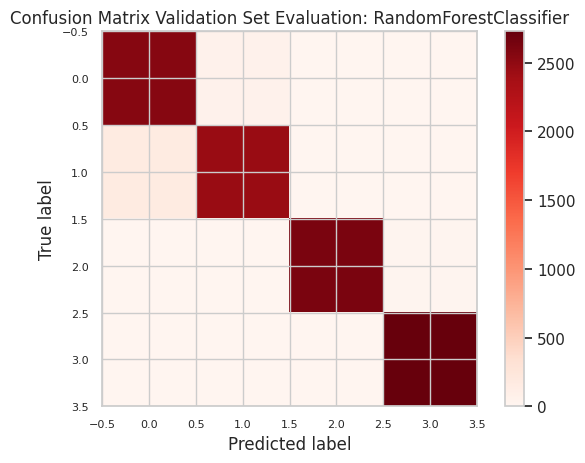


Model Performance on Test set - Random Forest::

==================== RandomForestClassifier ====================

Test Set Evaluation: RandomForestClassifier
Precision: 0.9798
Recall: 0.9796
F1 Score: 0.9796
ROC AUC: 0.9981
Accuracy: 0.9796


Classification Report: Test set - RandomForestClassifier  

              precision    recall  f1-score   support

    Goldcard       0.95      0.98      0.96      2590
   Moneycard       0.98      0.95      0.96      2621
  Simplecard       1.00      1.00      1.00      2649
     UK_Card       1.00      1.00      1.00      2724

    accuracy                           0.98     10584
   macro avg       0.98      0.98      0.98     10584
weighted avg       0.98      0.98      0.98     10584

              precision    recall  f1-score   support

    Goldcard       0.95      0.98      0.96      2590
   Moneycard       0.98      0.95      0.96      2621
  Simplecard       1.00      1.00      1.00      2649
     UK_Card       1.00      1.00      1.00

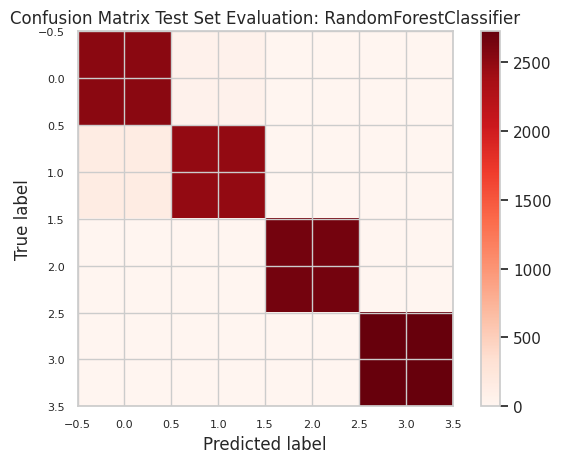

In [97]:
# Fit the Logistic Regression model on the training set
rf_model_B.fit(X_train_scaled_2, y_train_2)
# Print model performance on the validation set
print("Model Performance on Validation set - Random Forest::")
evaluate_model2(rf_model_B, X_valid_scaled_2, y_valid_2, set_name="Validation")
# Print model performance on the test set
print("\nModel Performance on Test set - Random Forest::")
evaluate_model2(rf_model_B, X_test_scaled_2, y_test_2, set_name="Test")

In [98]:
# Random Forest Model B after hyperparameter tuning and cross-validation
# Create a Random Forest model with a set random state
rf_model = RandomForestClassifier(random_state=42)
# Define the parameter grid for hyperparameter tuning
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [10, 20, 30]
}

In [99]:
# Use GridSearchCV for hyperparameter tuning
rf_grid = GridSearchCV(rf_model, param_grid, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5), verbose=1)
rf_grid.fit(X_train_scaled_2, y_train_2)
# Get the best model from the grid search
rf_best_model = rf_grid.best_estimator_
# Print the best hyperparameters found
print("Best Hyperparameters:", rf_grid.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters: {'max_depth': 30, 'n_estimators': 200}


In [100]:
# Perform cross-validation on the training set with the best model
cv_scores_rf = cross_val_score(rf_best_model, X_train_scaled_2, y_train_2, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5))
# Print cross-validation scores
print("Cross-Validation Scores with Best Model of Random Forest Classification:")
print(cv_scores_rf)
print(f"Average F1 Weighted Score: {cv_scores_rf.mean():.4f}\n")

Cross-Validation Scores with Best Model of Random Forest Classification:
[0.97689045 0.97493756 0.97557847 0.97333734 0.97516384]
Average F1 Weighted Score: 0.9752



Model Performance on Validation set - RandomForestClassifier:

==================== RandomForestClassifier ====================

Validation Set Evaluation: RandomForestClassifier
Precision: 0.9780
Recall: 0.9775
F1 Score: 0.9775
ROC AUC: 0.9986
Accuracy: 0.9775


Classification Report: Validation set - RandomForestClassifier  

              precision    recall  f1-score   support

    Goldcard       0.94      0.98      0.96      2608
   Moneycard       0.98      0.93      0.96      2620
  Simplecard       1.00      1.00      1.00      2626
     UK_Card       0.99      1.00      1.00      2730

    accuracy                           0.98     10584
   macro avg       0.98      0.98      0.98     10584
weighted avg       0.98      0.98      0.98     10584

              precision    recall  f1-score   support

    Goldcard       0.94      0.98      0.96      2608
   Moneycard       0.98      0.93      0.96      2620
  Simplecard       1.00      1.00      1.00      2626
     UK_Card      

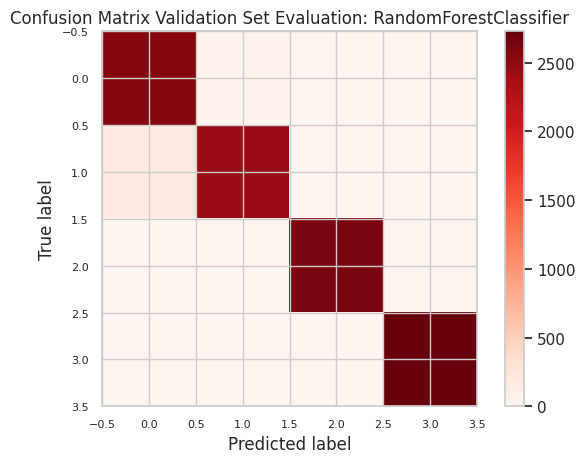

Model Performance on Test set - RandomForestClassifier:

==================== RandomForestClassifier ====================

Test Set Evaluation: RandomForestClassifier
Precision: 0.9806
Recall: 0.9804
F1 Score: 0.9804
ROC AUC: 0.9984
Accuracy: 0.9804


Classification Report: Test set - RandomForestClassifier  

              precision    recall  f1-score   support

    Goldcard       0.95      0.98      0.96      2590
   Moneycard       0.98      0.95      0.96      2621
  Simplecard       1.00      1.00      1.00      2649
     UK_Card       1.00      1.00      1.00      2724

    accuracy                           0.98     10584
   macro avg       0.98      0.98      0.98     10584
weighted avg       0.98      0.98      0.98     10584

              precision    recall  f1-score   support

    Goldcard       0.95      0.98      0.96      2590
   Moneycard       0.98      0.95      0.96      2621
  Simplecard       1.00      1.00      1.00      2649
     UK_Card       1.00      1.00   

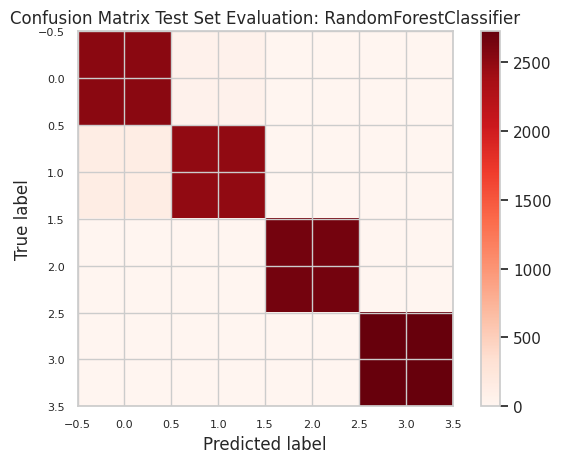

In [101]:
# Fit the best Random Forest model on the training set
rf_best_model.fit(X_train_scaled_2, y_train_2)

# Print model performance on the validation set
print("Model Performance on Validation set - RandomForestClassifier:")
evaluate_model2(rf_best_model, X_valid_scaled_2, y_valid_2, set_name="Validation")

# Print model performance on the test set
print("Model Performance on Test set - RandomForestClassifier:")
evaluate_model2(rf_best_model, X_test_scaled_2, y_test_2, set_name="Test")

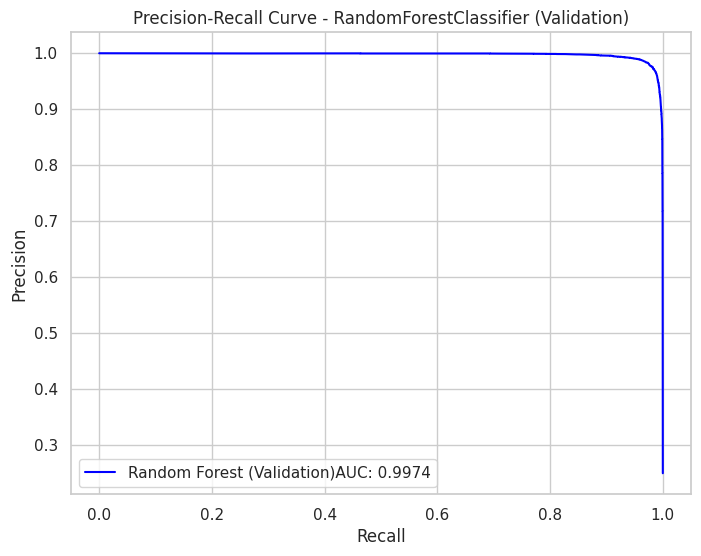

In [102]:
# Precision-Recall curve for validation and test set of Model B
# Binarize the labels for precision-recall curve
from sklearn.preprocessing import StandardScaler, LabelBinarizer

y_valid_2_bin = label_binarize(y_valid_2, classes=np.unique(y_valid_2))
y_test_2_bin = label_binarize(y_test_2, classes=np.unique(y_test_2))
# Predict probabilities on the validation set
y_valid_pred_proba_rf = rf_best_model.predict_proba(X_valid_scaled_2)
# Calculate precision and recall for various thresholds
precision_rf_valid, recall_rf_valid, thresholds_rf_valid = precision_recall_curve(y_valid_2_bin.ravel(), y_valid_pred_proba_rf.ravel())
# Calculate AUC for validation set
auc_rf_valid = auc(recall_rf_valid, precision_rf_valid)
# Plot the precision-recall curve for validation set
plt.figure(figsize=(8, 6))
plt.plot(recall_rf_valid, precision_rf_valid, color='blue', label=f'Random Forest (Validation)AUC: {auc_rf_valid:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - RandomForestClassifier (Validation)')
plt.legend()
plt.grid(True)
plt.show()

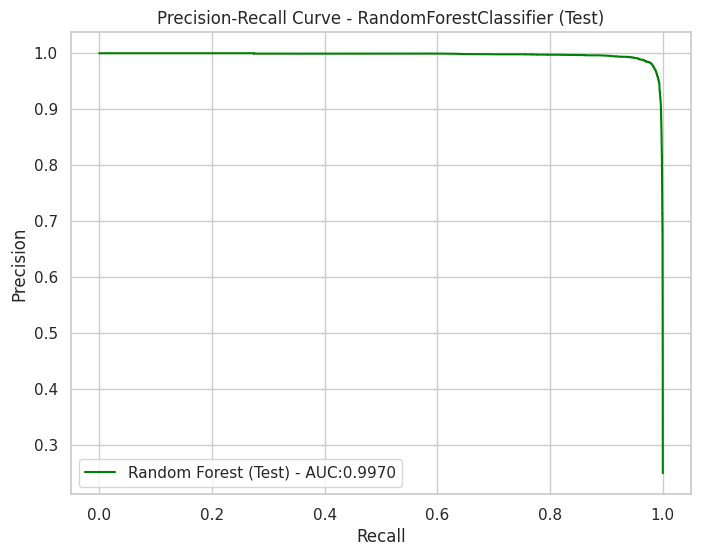

In [103]:
# Predict probabilities on the test set
y_test_pred_proba_rf = rf_best_model.predict_proba(X_test_scaled_2)
# Calculate precision and recall for various thresholds
precision_rf_test, recall_rf_test, thresholds_rf_test = precision_recall_curve(y_test_2_bin.ravel(), y_test_pred_proba_rf.ravel())
# Calculate AUC for test set
auc_rf_test = auc(recall_rf_test, precision_rf_test)
# Plot the precision-recall curve for test set
plt.figure(figsize=(8, 6))
plt.plot(recall_rf_test, precision_rf_test, color='green', label=f'Random Forest (Test) - AUC:{auc_rf_test:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - RandomForestClassifier (Test)')
plt.legend()
plt.grid(True)
plt.show()

Model Performance on Validation set - RandomForestClassifier:


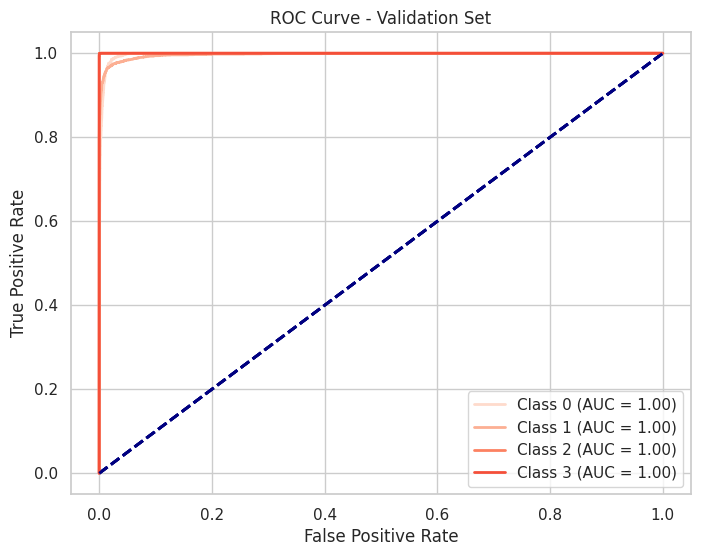

Model Performance on Test set - RandomForestClassifier:


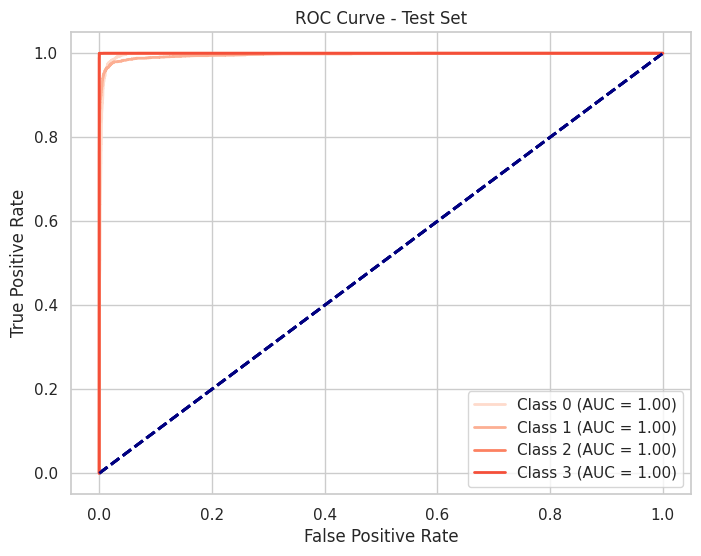

In [104]:


#ROC Curve on validation and test set of Model
def evaluate_model_with_roc(model, X, y, set_name="Set"):
    lb = LabelBinarizer()
    y_bin = lb.fit_transform(y)
    y_pred_prob = model.predict_proba(X)
    # Compute ROC curve and ROC area for each class
    n_classes = y_bin.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {set_name}')
    plt.legend(loc='lower right')
    plt.show()

# Evaluate on Validation Set with ROC Curve
print("Model Performance on Validation set - RandomForestClassifier:")
evaluate_model_with_roc(rf_best_model, X_valid_scaled_2, y_valid_2, set_name="Validation Set")
# Evaluate on Test Set with ROC Curve
print("Model Performance on Test set - RandomForestClassifier:")
evaluate_model_with_roc(rf_best_model, X_test_scaled_2, y_test_2, set_name="Test Set")


In [105]:
# Cross-Validation stability of Model 2
# Cross-validation scores with the best model
cv_scores_rf = cross_val_score(rf_best_model, X_train_scaled_2, y_train_2, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5))
print("Cross-Validation Scores with Best Model of Random Forest Classification:")
print(cv_scores_rf)
print(f"Average F1 Weighted Score: {cv_scores_rf.mean():.4f}")
print(f"Standard Deviation of F1 Weighted Scores: {cv_scores_rf.std():.4f}")
# Individual cross-validation scores
for i, score in enumerate(cv_scores_rf):
    print(f"Fold {i + 1}: {score:.4f}")
# Train the model on the entire training set
rf_best_model.fit(X_train_scaled_2, y_train_2)

Cross-Validation Scores with Best Model of Random Forest Classification:
[0.97689045 0.97493756 0.97557847 0.97333734 0.97516384]
Average F1 Weighted Score: 0.9752
Standard Deviation of F1 Weighted Scores: 0.0011
Fold 1: 0.9769
Fold 2: 0.9749
Fold 3: 0.9756
Fold 4: 0.9733
Fold 5: 0.9752


RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)

Train Sizes: [ 6773 22013 37253 52493 67734]
Training Scores Mean: [1.         1.         1.         1.         0.99999114]
Training Scores Std: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.23267434e-06]
Test Scores Mean: [0.94240073 0.95927315 0.96717467 0.9722744  0.97522807]
Test Scores Std: [0.00125274 0.00097766 0.00077495 0.00100535 0.0010368 ]


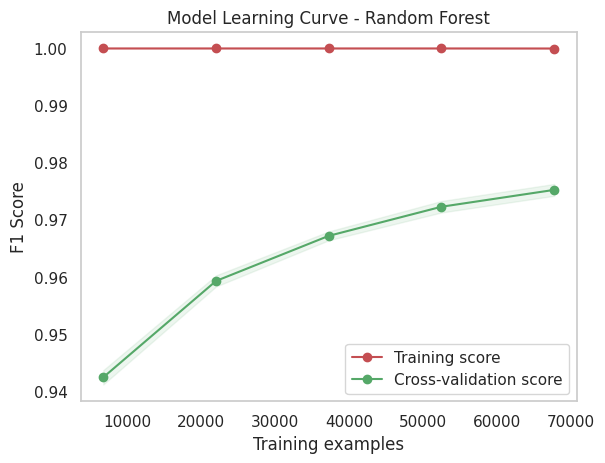

In [106]:
# Overfitting Analysis of Model B
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None,
    train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)

    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
    train_sizes=train_sizes, scoring='f1_weighted')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,
                        alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    plt.legend(loc="best")

      # Print calculations
    print(f"Train Sizes: {train_sizes}")
    print(f"Training Scores Mean: {train_scores_mean}")
    print(f"Training Scores Std: {train_scores_std}")
    print(f"Test Scores Mean: {test_scores_mean}")
    print(f"Test Scores Std: {test_scores_std}")
    return plt
    # Plot learning curves
plot_learning_curve(rf_best_model, "Model Learning Curve - Random Forest",X_train_scaled_2, y_train_2, cv=StratifiedKFold(n_splits=5), n_jobs=-1)
plt.show()

In [107]:

# Optimal PSP prediction for each exiting transaction
# Extract 'PSP' column for comparison
psp_column = df_2['PSP']
# Drop 'PSP' and 'success' columns from the features
X_predict = df_2.drop(['PSP', 'success'], axis=1)
# Define numeric features and apply StandardScaler
numeric_features = ['amount', '3D_secured', 'transaction_fee', 'day_of_week', 'minute_of_day',
                    'payment_attempts', 'success_probabilities']
numeric_transformer = StandardScaler()
# Define categorical features and apply OneHotEncoder
categorical_features = ['country', 'card']
categorical_transformer = OneHotEncoder()
# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
transformers=[('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)])
# Transform the features using the preprocessor
X_predict_transformed = preprocessor.fit_transform(X_predict)
# Predict the 'PSP' values using the best Random Forest model
df_2['Predicted_PSP'] = rf_best_model.predict(X_predict_transformed)
# Restore the original 'PSP' values for comparison
df_2['PSP'] = psp_column
# Print the DataFrame with predicted 'PSP' values
print(df_2)

           country  amount  success         PSP  3D_secured    card  \
0          Austria       6        0   Moneycard           0  Diners   
1          Austria       6        0  Simplecard           0  Diners   
2          Austria       6        0     UK_Card           0  Diners   
3          Austria       6        0     UK_Card           0  Diners   
4          Austria       6        0  Simplecard           0  Diners   
...            ...     ...      ...         ...         ...     ...   
50405  Switzerland     499        0     UK_Card           0  Master   
50406  Switzerland     499        0     UK_Card           0  Master   
50407  Switzerland     499        0     UK_Card           0  Master   
50408  Switzerland     499        0     UK_Card           0  Master   
50409  Switzerland     499        0     UK_Card           0  Master   

       transaction_fee  day_of_week  minute_of_day  payment_attempts  \
0                  2.0            3            229                 1   
1  

In [108]:
def choose_best_psp(row):
    if pd.Series(row['Predicted_PSP']).nunique() == 1:
    # No tie, return the predicted PSP
        return row['Predicted_PSP']
    else:
        # There is a tie, choose the most cost-effective PSP based on fee comparison
        min_fee_psp = row.loc[row['transaction_fee'].idxmin()]['Predicted_PSP']
        # Filter rows with tied predictions
        tied_rows = row[row['Predicted_PSP'].duplicated(keep=False)]
    # Check if the row with the minimum fee is part of the tied rows
    if min_fee_psp in tied_rows['Predicted_PSP'].values:
        return min_fee_psp
    else:
        # If not, choose the PSP with the lowest transaction fee
        return tied_rows.loc[tied_rows['transaction_fee'].idxmin()]['Predicted_PSP']
# Apply the function to each row in df_2
df_2['Best_PSP'] = df_2.apply(choose_best_psp, axis=1)
# Display the updated DataFrame with the 'Best_PSP' column
print(df_2)

           country  amount  success         PSP  3D_secured    card  \
0          Austria       6        0   Moneycard           0  Diners   
1          Austria       6        0  Simplecard           0  Diners   
2          Austria       6        0     UK_Card           0  Diners   
3          Austria       6        0     UK_Card           0  Diners   
4          Austria       6        0  Simplecard           0  Diners   
...            ...     ...      ...         ...         ...     ...   
50405  Switzerland     499        0     UK_Card           0  Master   
50406  Switzerland     499        0     UK_Card           0  Master   
50407  Switzerland     499        0     UK_Card           0  Master   
50408  Switzerland     499        0     UK_Card           0  Master   
50409  Switzerland     499        0     UK_Card           0  Master   

       transaction_fee  day_of_week  minute_of_day  payment_attempts  \
0                  2.0            3            229                 1   
1  

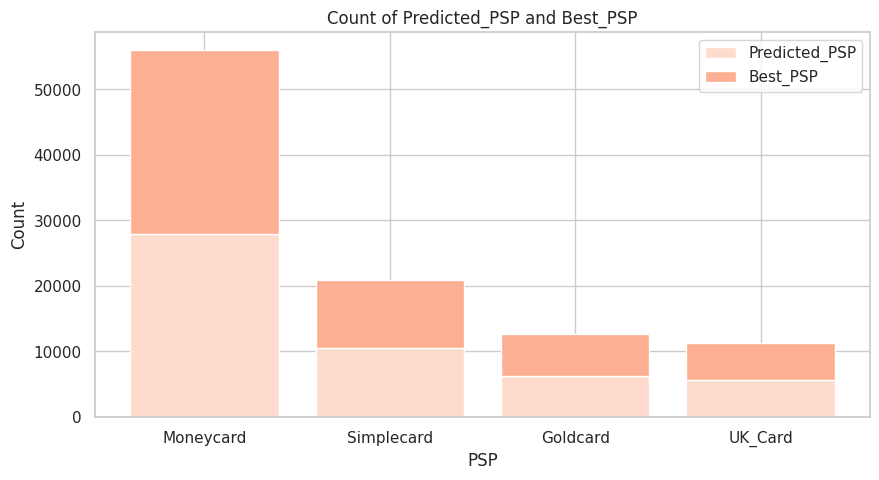

In [109]:


# Count occurrences of Predicted_PSP
predicted_psp_counts = df_2['Predicted_PSP'].value_counts()

# Count occurrences of Best_PSP
best_psp_counts = df_2['Best_PSP'].value_counts()

# Combine the counts into a DataFrame
matching_counts = pd.DataFrame({
'Predicted_PSP_Count': predicted_psp_counts,
'Best_PSP_Count': best_psp_counts
})

# Plot the count
plt.figure(figsize=(10, 5))
plt.bar(matching_counts.index, matching_counts['Predicted_PSP_Count'], label='Predicted_PSP')
plt.bar(matching_counts.index, matching_counts['Best_PSP_Count'], label='Best_PSP', bottom=matching_counts['Predicted_PSP_Count'])
plt.xlabel('PSP')
plt.ylabel('Count')
plt.title('Count of Predicted_PSP and Best_PSP')
plt.legend()
plt.show()


Proposal for Model Deployment:

In order to seamlessly integrate the predictive model into the company's operational workflow, we suggest a phased approach focusing on usability, practicality, and smooth integration with existing systems. Our proposed deployment options include embedding the model within current systems, developing a standalone application, or implementing a graphical user interface (GUI). Each option offers distinct advantages and considerations, as detailed below:
1. Integration into Existing Systems:

Description: This approach involves integrating the predictive model directly into the company's current transaction processing system.

Advantages:

- Seamless Integration: Integrating the model within existing systems ensures a smooth transition with minimal disruption to ongoing workflows.
- Real-time Decision-Making: By embedding the model within the transaction processing system, decisions on credit card routing can be made in real-time, enhancing efficiency and responsiveness.
- Reduced Manual Intervention: Automation of the credit card routing process reduces the need for manual intervention, leading to streamlined operations and decreased error risk.

Considerations:

- Technical Integration: Integration with current systems may necessitate coordination with IT departments and adherence to specific technical requirements.
- System Compatibility: Ensuring compatibility with existing systems and infrastructure is crucial to avoid conflicts or performance issues.

2. Development of a Standalone Application:

Description: This approach involves creating a standalone application to host the predictive model, offering a dedicated platform for credit card routing decisions.

Advantages:

- Flexibility and Customization: A standalone application allows for customization and user interface design tailored to specific user needs and workflows.
- Centralized Management: Centralizing the predictive model within a standalone application facilitates easier management and maintenance, with updates and enhancements implemented as necessary.
- Enhanced Security: Hosting the model within a dedicated application may enhance security measures, safeguarding sensitive transaction data and ensuring compliance with regulatory requirements.

Considerations:

- User Training: Users may require training to effectively utilize the standalone application and grasp its functionalities.
- Development and Maintenance: Developing and maintaining a standalone application entails additional resources and ongoing support from development teams.

3. Implementation of a Graphical User Interface (GUI):

Description: This approach involves developing a graphical user interface (GUI) to provide an intuitive platform for interacting with the predictive model.

Advantages:

- User-Friendly Interface: A GUI offers an intuitive interface, simplifying interaction with the predictive model and enabling users to input data, view results, and make decisions effortlessly.
- Accessibility: A GUI can be accessed from any internet-connected device, providing flexibility and accessibility for users across various departments or locations.
- Visualizations and Insights: Incorporating visualizations and insights generated by the predictive model into the GUI enhances user comprehension and aids decision-making.

Considerations:

- Design and Usability: Designing an effective GUI requires careful consideration of user experience (UX) principles and usability testing to ensure intuitive navigation and functionality.
- Integration with Backend Systems: The GUI must be seamlessly integrated with backend systems to retrieve data and communicate with the predictive model effectively.

Conclusion

Accuracy:

- XGBoost performs better on the training dataset than logistic regression, with an accuracy of 83.37% as opposed to 79.88%.On the test dataset, however, XGBoost performs little less well than logistic regression, with an accuracy of 79% as opposed to 79.11%.

Precision:

- When compared to logistic regression, XGBoost exhibits better precision on training and testing datasets. This suggests that XGBoost can minimize false positives while accurately identifying positive cases, or real positives.

Recall:

- Both XGBoost and logistic regression have comparable recall scores for training and testing datasets, demonstrating their capacity to distinguish genuine positives from all real positive occurrences.

F1 Score:

- In comparison to logistic regression, XGBoost produces a higher F1 score on both t raining and testing datasets, indicating a better trade-off between precision and recall.

All things considered, XGBoost outperforms logistic regression in terms of accuracy, precision, and F1 score—especially when it comes to the training dataset. Even yet, logistic regression continues to perform competitively, es

pecially when applied to the testing dataset. In order to optimize both models in light of the performance discrepancies, more investigation could be required.
